In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy.interpolate import interp1d

In [48]:
# --- χ² 2D contour lines and minimization plots --- #

# This function generates the χ² contour maps shown in Figures 5.1–5.4.
# It fixes two oscillation parameters at their values that minimize the χ² 
# and scans over the two others.
###############################################################################
def contours(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO):
###############################################################################
    
    # Loading the grid of values
    parameters = np.load('parameters.npy', allow_pickle = True)
    
    # Extracting
    t_list = parameters[0]
    dm21_list = parameters[1]
    dm31_NO_list = parameters[2]
    dm31_IO_list = parameters[3]
    t12_list = parameters[4]
    t13_NO_list = parameters[5]
    t13_IO_list = parameters[6]
    
    # Indices corresponding to the best-fit values (central point of each grid)
    i_bf = len(dm21_list)//2 # Δm²₂₁
    j_bf = len(dm31_NO_list)//2 # Δm²₃₁
    k_bf = len(t12_list)//2 # θ₁₂
    l_bf = len(t13_NO_list)//2 # θ₁₃
    
    # Index corresponding to 6 years of exposure in the t_list
    pos_6 = int(((3/5)*len(t_list)) - 1)

    
    ###################### --- Fixed θ₁₂ and θ₁₃ --- ##########################
    
    # X-axis: Δm²₃₁, Y-axis: Δm²₂₁
    x_NO = dm31_NO_list
    x_IO = dm31_IO_list
    y = dm21_list
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TONO_tNO[0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TONO_tNO[0][0])):
            
            # Loop over θ₁₂ grid (index k)
            for k in range(len(chi2_TONO_tNO[0][0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping θ₁₂ and θ₁₃ → store min χ² along (k,l) for this (i,j)
            chi2_min_list_tmp.append(chi2_TONO_tNO[pos_6][i][j][k_min][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_NO = np.linspace(min(x_NO), max(x_NO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_NO, yy = np.meshgrid(X_NO, Y)

    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_NO, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap='magma_r')
    plt.axvline(dm31_NO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_NO_list[j_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_NO_list[j_bf]*0.99, dm31_NO_list[j_bf]*1.01)
    plt.ylim(dm21_list[i_bf]*0.99, dm21_list[i_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TONO_tIO[0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TONO_tIO[0][0])):
            
            # Loop over θ₁₂ grid (index k)
            for k in range(len(chi2_TONO_tIO[0][0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping θ₁₂ and θ₁₃ → store min χ² along (k,l) for this (i,j)
            chi2_min_list_tmp.append(chi2_TONO_tIO[pos_6][i][j][k_min][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_IO = np.linspace(min(x_IO), max(x_IO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_IO, yy = np.meshgrid(X_IO, Y)
    Z_min_NO = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_IO, yy, Z, [Z_min_NO,8,16,25,36,49,64,81,100], cmap='magma_r')
    plt.axvline(dm31_IO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_IO_list[j_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_NO,2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_IO_list[j_bf]*0.99, dm31_IO_list[j_bf]*1.01)
    plt.ylim(dm21_list[i_bf]*0.99, dm21_list[i_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TOIO_tNO[0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TOIO_tNO[0][0])):
            
            # Loop over θ₁₂ grid (index k)
            for k in range(len(chi2_TOIO_tNO[0][0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping θ₁₂ and θ₁₃ → store min χ² along (k,l) for this (i,j)
            chi2_min_list_tmp.append(chi2_TOIO_tNO[pos_6][i][j][k_min][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_NO = np.linspace(min(x_NO), max(x_NO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_NO, yy = np.meshgrid(X_NO, Y)
    Z_min_IO = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_NO, yy, Z, [Z_min_IO,8,16,25,36,49,64,81,100], cmap='magma_r')
    plt.axvline(dm31_NO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_NO_list[j_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_IO,2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_NO_list[j_bf]*0.99, dm31_NO_list[j_bf]*1.01)
    plt.ylim(dm21_list[i_bf]*0.99, dm21_list[i_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TOIO_tIO[0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TOIO_tIO[0][0])):
            
            # Loop over θ₁₂ grid (index k)
            for k in range(len(chi2_TOIO_tIO[0][0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping θ₁₂ and θ₁₃ → store min χ² along (k,l) for this (i,j)
            chi2_min_list_tmp.append(chi2_TOIO_tIO[pos_6][i][j][k_min][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_IO = np.linspace(min(x_IO), max(x_IO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_IO, yy = np.meshgrid(X_IO, Y)

    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_IO, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap='magma_r')
    plt.axvline(dm31_IO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_IO_list[j_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_IO_list[j_bf]*0.99, dm31_IO_list[j_bf]*1.01)
    plt.ylim(dm21_list[i_bf]*0.99, dm21_list[i_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()

    ########################## Fixed Δm²₃₁ and θ₁₃ ############################
    
    # X-axis: θ₁₂, Y-axis: Δm²₂₁
    x = t12_list
    y = dm21_list
    xx, yy = np.meshgrid(x,y)
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TONO_tNO[0])):
        chi2_min_list_tmp = []
        
        # Loop over θ₁₂ grid (index k)
        for k in range(len(chi2_TONO_tNO[0][0][0])):
            
            # Loop over Δm²₃₁ (index j)
            for j in range(len(chi2_TONO_tNO[0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₃₁ and θ₁₃ → store min χ² along (j,l) for this (i,k)
            chi2_min_list_tmp.append(chi2_TONO_tNO[pos_6][i][j_min][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)

    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X = np.linspace(min(x), max(x), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx, yy = np.meshgrid(X, Y)

    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap='magma_r')
    plt.axvline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[k_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(t12_list[k_bf]*0.991, t12_list[k_bf]*1.009)
    plt.ylim(dm21_list[i_bf]*0.991, dm21_list[i_bf]*1.009)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TONO_tIO[0])):
        chi2_min_list_tmp = []
        
        # Loop over θ₁₂ grid (index k)
        for k in range(len(chi2_TONO_tIO[0][0][0])):
            
            # Loop over Δm²₃₁ (index j)
            for j in range(len(chi2_TONO_tIO[0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₃₁ and θ₁₃ → store min χ² along (j,l) for this (i,k)
            chi2_min_list_tmp.append(chi2_TONO_tIO[pos_6][i][j_min][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
        
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X = np.linspace(min(x), max(x), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx, yy = np.meshgrid(X, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx, yy, Z, [Z_min_NO,8,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[k_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_NO,2)))
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(t12_list[k_bf]*0.991, t12_list[k_bf]*1.009)
    plt.ylim(dm21_list[i_bf]*0.991, dm21_list[i_bf]*1.009)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TOIO_tNO[0])):
        chi2_min_list_tmp = []
        
        # Loop over θ₁₂ grid (index k)
        for k in range(len(chi2_TOIO_tNO[0][0][0])):
            
            # Loop over Δm²₃₁ (index j)
            for j in range(len(chi2_TOIO_tNO[0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₃₁ and θ₁₃ → store min χ² along (j,l) for this (i,k)
            chi2_min_list_tmp.append(chi2_TOIO_tNO[pos_6][i][j_min][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
        
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X = np.linspace(min(x), max(x), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx, yy = np.meshgrid(X, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx, yy, Z, [Z_min_IO,8,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[k_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_IO,2)))
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(t12_list[k_bf]*0.991, t12_list[k_bf]*1.009)
    plt.ylim(dm21_list[i_bf]*0.991, dm21_list[i_bf]*1.009)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over Δm²₂₁ (index i)
    for i in range(len(chi2_TOIO_tIO[0])):
        chi2_min_list_tmp = []
        
        # Loop over θ₁₂ grid (index k)
        for k in range(len(chi2_TOIO_tIO[0][0][0])):
            
            # Loop over Δm²₃₁ (index j)
            for j in range(len(chi2_TOIO_tIO[0][0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₃₁ and θ₁₃ → store min χ² along (j,l) for this (i,k)
            chi2_min_list_tmp.append(chi2_TOIO_tIO[pos_6][i][j_min][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
        
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X = np.linspace(min(x), max(x), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx, yy = np.meshgrid(X, Y)
    
    # Plotting
    
    plt.figure(dpi = 300)
    plt.contourf(xx, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(dm21_list[i_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[k_min], dm21_list[i_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\Delta m^2_{21}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(t12_list[k_bf]*0.991, t12_list[k_bf]*1.009)
    plt.ylim(dm21_list[i_bf]*0.991, dm21_list[i_bf]*1.009)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()

    ########################## Fixed Δm²₂₁ and θ₁₃ ############################
    
    # X-axis: Δm²₃₁, Y-axis: θ₁₂
    x_NO = dm31_NO_list
    x_IO = dm31_IO_list
    y = t12_list
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over θ₁₂ grid (index k)
    for k in range(len(chi2_TONO_tNO[0][0][0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TONO_tNO[0][0])):
            
            # Loop over Δm²₂₁ (index i)
            for i in range(len(chi2_TONO_tNO[0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₂₁ and θ₁₃ → store min χ² along (i,l) for this (k,j)
            chi2_min_list_tmp.append(chi2_TONO_tNO[pos_6][i_min][j][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_NO = np.linspace(min(x_NO), max(x_NO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_NO, yy = np.meshgrid(X_NO, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_NO, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(dm31_NO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_NO_list[j_min], t12_list[k_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\theta_{12}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_NO_list[j_bf]*0.99, dm31_NO_list[j_bf]*1.01)
    plt.ylim(t12_list[k_bf]*0.99, t12_list[k_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()

    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over θ₁₂ grid (index k)
    for k in range(len(chi2_TONO_tIO[0][0][0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TONO_tIO[0][0])):
            
            # Loop over Δm²₂₁ (index i)
            for i in range(len(chi2_TONO_tIO[0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₂₁ and θ₁₃ → store min χ² along (i,l) for this (k,j)
            chi2_min_list_tmp.append(chi2_TONO_tIO[pos_6][i_min][j][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
        
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 5)
    
    # Creating fine grids for plotting
    X_IO = np.linspace(min(x_IO), max(x_IO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_IO, yy = np.meshgrid(X_IO, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_IO, yy, Z, [Z_min_NO,8,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(dm31_IO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_IO_list[j_min], t12_list[k_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_NO,2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\theta_{12}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.559, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_IO_list[j_bf]*0.99, dm31_IO_list[j_bf]*1.01)
    plt.ylim(t12_list[k_bf]*0.99, t12_list[k_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over θ₁₂ grid (index k)
    for k in range(len(chi2_TOIO_tNO[0][0][0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TOIO_tNO[0][0])):
            
            # Loop over Δm²₂₁ (index i)
            for i in range(len(chi2_TOIO_tNO[0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₂₁ and θ₁₃ → store min χ² along (i,l) for this (k,j)
            chi2_min_list_tmp.append(chi2_TOIO_tNO[pos_6][i_min][j][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
    
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 5)
    
    # Creating fine grids for plotting
    X_NO = np.linspace(min(x_NO), max(x_NO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_NO, yy = np.meshgrid(X_NO, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_NO, yy, Z, [Z_min_IO,8,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(dm31_NO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_NO_list[j_min], t12_list[k_min], '.r', label = r'$\chi^2_{min} = $' + str(round(Z_min_IO,2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\theta_{12}$')
    plt.figtext(0.3505, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.392, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_NO_list[j_bf]*0.99, dm31_NO_list[j_bf]*1.01)
    plt.ylim(t12_list[k_bf]*0.99, t12_list[k_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minima
    chi2_min_list = []
    
    # Loop over θ₁₂ grid (index k)
    for k in range(len(chi2_TOIO_tIO[0][0][0])):
        chi2_min_list_tmp = []
        
        # Loop over Δm²₃₁ (index j)
        for j in range(len(chi2_TOIO_tIO[0][0])):
            
            # Loop over Δm²₂₁ (index i)
            for i in range(len(chi2_TOIO_tIO[0])):
                
                # Loop over θ₁₃ grid (index l)
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    
                    # If current χ² is smaller, update minimum
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
            # After looping Δm²₂₁ and θ₁₃ → store min χ² along (i,l) for this (k,j)
            chi2_min_list_tmp.append(chi2_TOIO_tIO[pos_6][i_min][j][k][l_min])
            
        # Append 1D list to global list
        chi2_min_list.append(chi2_min_list_tmp)
        
    # Converting the 2D χ² list into a finer-resolution grid using interpolation
    Z = zoom(chi2_min_list, 7)
    
    # Creating fine grids for plotting
    X_IO = np.linspace(min(x_IO), max(x_IO), Z.shape[1])
    Y = np.linspace(min(y), max(y), Z.shape[0])
    xx_IO, yy = np.meshgrid(X_IO, Y)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.contourf(xx_IO, yy, Z, [np.min(Z),4,9,16,25,36,49,64,81,100], cmap = 'magma_r')
    plt.axvline(dm31_IO_list[j_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.axhline(t12_list[k_bf], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_IO_list[j_min], t12_list[k_min], '.r', label = r'$\chi^2_{min} = $' + str(round(np.min(Z),2)))
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\theta_{12}$')
    plt.figtext(0.362, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.398, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.417, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.466, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.534, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.553, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.xlim(dm31_IO_list[j_bf]*0.99, dm31_IO_list[j_bf]*1.01)
    plt.ylim(t12_list[k_bf]*0.99, t12_list[k_bf]*1.01)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend(fancybox=True)
    plt.colorbar()
    plt.show()

In [49]:
# This function generates the 1D χ² profile plots shown in Figures 5.1-5.4.
# It fixes three of the oscillation parameters at their values that minimize 
# the χ² and scans over the other.
###############################################################################
def chi2_x_param(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO):
###############################################################################
    
    # Loading the grid of values
    parameters = np.load('parameters.npy', allow_pickle = True)
    
    # Extracting
    t_list = parameters[0]
    dm21_list = parameters[1]
    dm31_NO_list = parameters[2]
    dm31_IO_list = parameters[3]
    t12_list = parameters[4]
    t13_NO_list = parameters[5]
    t13_IO_list = parameters[6]
    
    # Indices corresponding to the best-fit values (central point of each grid)
    i_bf = len(dm21_list)//2
    j_bf = len(dm31_NO_list)//2
    k_bf = len(t12_list)//2
    l_bf = len(t13_NO_list)//2
    
    # Index corresponding to 6 years of exposure in the t_list
    pos_6 = int(((3/5)*len(t_list)) - 1)

    ############################# χ² x Δm²₂₁ ##################################
    
    # Parameter to be scanned on x-axis: Δm²₂₁
    x = dm21_list
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₂₁ grid (i index)
    for i in range(len(chi2_TONO_tNO[0])):
        
        # At each i, loop over the other parameters (j,k,l) and find the minimum
        for j in range(len(chi2_TONO_tNO[0][0])):
            for k in range(len(chi2_TONO_tNO[0][0][0])):
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning j,k,l → store the minimum χ² for current Δm²₂₁ (i)                
        chis_min_list.append(chi2_TONO_tNO[pos_6][i][j_min][k_min][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min_NONO = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(dm21_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm21_list[i_min], chi2_min_NONO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{21}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.626, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₂₁ grid (i index)
    for i in range(len(chi2_TONO_tIO[0])):
        
        # At each i, loop over the other parameters (j,k,l) and find the minimum
        for j in range(len(chi2_TONO_tIO[0][0])):
            for k in range(len(chi2_TONO_tIO[0][0][0])):
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning j,k,l → store the minimum χ² for current Δm²₂₁ (i)
        chis_min_list.append(chi2_TONO_tIO[pos_6][i][j_min][k_min][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min_NOIO = np.min(Z)
    
    # Plotting    
    plt.figure(dpi = 300)
    plt.plot(X, Z,'k')
    plt.axvline(dm21_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm21_list[i_min], chi2_min_NOIO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{21}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.621, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₂₁ grid (i index)
    for i in range(len(chi2_TOIO_tNO[0])):
        
        # At each i, loop over the other parameters (j,k,l) and find the minimum
        for j in range(len(chi2_TOIO_tNO[0][0])):
            for k in range(len(chi2_TOIO_tNO[0][0][0])):
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning j,k,l → store the minimum χ² for current Δm²₂₁ (i)
        chis_min_list.append(chi2_TOIO_tNO[pos_6][i][j_min][k_min][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min_IONO = np.min(Z)-0.01
    
    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(dm21_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm21_list[i_min], chi2_min_IONO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{21}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.620, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₂₁ grid (i index)
    for i in range(len(chi2_TOIO_tIO[0])):
        
        # At each i, loop over the other parameters (j,k,l) and find the minimum
        for j in range(len(chi2_TOIO_tIO[0][0])):
            for k in range(len(chi2_TOIO_tIO[0][0][0])):
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning j,k,l → store the minimum χ² for current Δm²₂₁ (i)
        chis_min_list.append(chi2_TOIO_tIO[pos_6][i][j_min][k_min][l_min])   
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min_IOIO = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(dm21_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm21_list[i_min], chi2_min_IOIO, 'ro', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{21}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.615, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()

    ############################# χ² x Δm²₃₁ ##################################
    
    # Parameter to be scanned on x-axis: Δm²₃₁
    x_NO = dm31_NO_list
    x_IO = dm31_IO_list
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₃₁ grid (j index)
    for j in range(len(chi2_TONO_tNO[0][0])):
        
        # At each j, loop over the other parameters (i,k,l) and find the minimum
        for i in range(len(chi2_TONO_tNO[0])):
            for k in range(len(chi2_TONO_tNO[0][0][0])):
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,k,l → store the minimum χ² for current Δm²₃₁ (j)
        chis_min_list.append(chi2_TONO_tNO[pos_6][i_min][j][k_min][l_min])   
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x_NO, chis_min_list, kind='cubic')
    X_NO = np.linspace(min(x_NO), max(x_NO), 1001)
    Z = f(X_NO)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X_NO[np.argmin(Z)]
    chi2_min = np.min(Z)
 
    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X_NO, Z, 'k')
    plt.axvline(dm31_NO_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_NO_list[i_min], chi2_min_NONO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.626, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₃₁ grid (j index)
    for j in range(len(chi2_TONO_tIO[0][0])):
        
        # At each j, loop over the other parameters (i,k,l) and find the minimum
        for i in range(len(chi2_TONO_tIO[0])):
            for k in range(len(chi2_TONO_tIO[0][0][0])):
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,k,l → store the minimum χ² for current Δm²₃₁ (j)
        chis_min_list.append(chi2_TONO_tIO[pos_6][i_min][j][k_min][l_min])    
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x_IO, chis_min_list, kind='cubic')
    X_IO = np.linspace(min(x_IO), max(x_IO), 1001)
    Z = f(X_IO)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X_IO[np.argmin(Z)]
    chi2_min = np.min(Z)
 
    # Plotting
    plt.figure(dpi=300)
    plt.plot(X_IO, Z, 'k')
    plt.axvline(dm31_IO_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(x_min, chi2_min_NOIO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.621, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₃₁ grid (j index)
    for j in range(len(chi2_TOIO_tNO[0][0])):
        
        # At each j, loop over the other parameters (i,k,l) and find the minimum
        for i in range(len(chi2_TOIO_tNO[0])):
            for k in range(len(chi2_TOIO_tNO[0][0][0])):
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,k,l → store the minimum χ² for current Δm²₃₁ (j)
        chis_min_list.append(chi2_TOIO_tNO[pos_6][i_min][j][k_min][l_min])
        
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x_NO, chis_min_list, kind='cubic')
    X_NO = np.linspace(min(x_NO), max(x_NO), 1001)
    Z = f(X_NO)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X_NO[np.argmin(Z)]
    chi2_min = np.min(Z)

    # Plotting
    plt.figure(dpi=300)
    plt.plot(X_NO, Z, 'k')
    plt.axvline(dm31_NO_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(x_min, chi2_min_IONO, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.620, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the Δm²₃₁ grid (j index)
    for j in range(len(chi2_TOIO_tIO[0][0])):
        
        # At each j, loop over the other parameters (i,k,l) and find the minimum
        for i in range(len(chi2_TOIO_tIO[0])):
            for k in range(len(chi2_TOIO_tIO[0][0][0])):
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,k,l → store the minimum χ² for current Δm²₃₁ (j)
        chis_min_list.append(chi2_TOIO_tIO[pos_6][i_min][j][k_min][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x_IO, chis_min_list, kind='cubic')
    X_IO = np.linspace(min(x_IO), max(x_IO), 1001)
    Z = f(X_IO)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X_IO[np.argmin(Z)]
    chi2_min = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X_IO, Z, 'k')
    plt.axvline(dm31_IO_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(dm31_IO_list[i_min], chi2_min_IOIO, 'ro', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\Delta m^2_{31}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.615, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.grid()
    plt.legend()
    plt.show()

    ############################### χ² x θ₁₂ ##################################
    
    # Parameter to be scanned on x-axis: θ₁₂
    x = t12_list
    
    # --- H1 = NO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the θ₁₂ grid (k index)
    for k in range(len(chi2_TONO_tNO[0][0][0])):
        
        # At each k, loop over the other parameters (i,j,l) and find the minimum
        for i in range(len(chi2_TONO_tNO[0])):
            for j in range(len(chi2_TONO_tNO[0][0])):
                for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                    if chi2_TONO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,j,l → store the minimum χ² for current θ₁₂ (k)
        chis_min_list.append(chi2_TONO_tNO[pos_6][i_min][j_min][k][l_min])

    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min = np.min(Z)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(t12_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[i_min], chi2_min, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.626, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = NO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the θ₁₂ grid (k index)
    for k in range(len(chi2_TONO_tIO[0][0][0])):
        
        # At each k, loop over the other parameters (i,j,l) and find the minimum
        for i in range(len(chi2_TONO_tIO[0])):
            for j in range(len(chi2_TONO_tIO[0][0])):
                for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                    if chi2_TONO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TONO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,j,l → store the minimum χ² for current θ₁₂ (k)               
        chis_min_list.append(chi2_TONO_tIO[pos_6][i_min][j_min][k][l_min])
        
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min = np.min(Z)

    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(t12_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[i_min], chi2_min, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_NOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.621, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(NO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the θ₁₂ grid (k index)
    for k in range(len(chi2_TOIO_tNO[0][0][0])):
        
        # At each k, loop over the other parameters (i,j,l) and find the minimum
        for i in range(len(chi2_TOIO_tNO[0])):
            for j in range(len(chi2_TOIO_tNO[0][0])):
                for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                    if chi2_TOIO_tNO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tNO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,j,l → store the minimum χ² for current θ₁₂ (k)               
        chis_min_list.append(chi2_TOIO_tNO[pos_6][i_min][j_min][k][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min = np.min(Z)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(t12_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[i_min], chi2_min, 'or', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IONO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.4175, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.459, 0.905, 'NO', fontsize='large', color='b', ha ='center')
    plt.figtext(0.484, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.533, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.601, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.620, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.grid()
    plt.legend()
    plt.show()
    
    # --- H1 = IO, χ²(IO) --- #
    
    # Initialize minimum χ² value
    chi_min = 1e10
    
    # List to store the χ² minimized over all other parameters at each x
    chis_min_list = []
    
    # Loop over the θ₁₂ grid (k index)
    for k in range(len(chi2_TOIO_tIO[0][0][0])):
        
        # At each k, loop over the other parameters (i,j,l) and find the minimum
        for i in range(len(chi2_TOIO_tIO[0])):
            for j in range(len(chi2_TOIO_tIO[0][0])):
                for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                    if chi2_TOIO_tIO[pos_6][i][j][k][l] <= chi_min:
                        chi_min = chi2_TOIO_tIO[pos_6][i][j][k][l]
                        i_min = i
                        j_min = j
                        k_min = k
                        l_min = l
                        
        # After scanning i,j,l → store the minimum χ² for current θ₁₂ (k)
        chis_min_list.append(chi2_TOIO_tIO[pos_6][i_min][j_min][k][l_min])
    
    # Interpolating the 1D χ² curve for smoother visualization
    f = interp1d(x, chis_min_list, kind='cubic')
    X = np.linspace(min(x), max(x), 1001)
    Z = f(X)
    
    # Finding the x corresponding to the minimum χ²
    x_min = X[np.argmin(Z)]
    chi2_min = np.min(Z)
    
    # Plotting
    plt.figure(dpi = 300)
    plt.plot(X, Z, 'k')
    plt.axvline(t12_list[i_min], c = 'gray', ls = '--', alpha = 0.5)
    plt.plot(t12_list[i_min], chi2_min, 'ro', label= r'$\chi^2_{min} = $' + str(round(chi2_min_IOIO,2)))
    plt.yticks([0,4,9,16,25,36,49,64,81,100])
    plt.ylim(-2,100)
    plt.xlabel(r'$\theta_{12}$')
    plt.ylabel(r'$\chi^2$')
    plt.figtext(0.424, 0.905, r'$\chi^2$(', fontsize='large', color='k', ha ='center')
    plt.figtext(0.460, 0.905, 'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.479, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.figtext(0.528, 0.905, r'($\text{H}_1$ = ', fontsize='large', color='k', ha ='center')
    plt.figtext(0.596, 0.905,'IO', fontsize='large', color='r', ha ='center')
    plt.figtext(0.615, 0.905, ')', fontsize='large', color='k', ha ='center')
    plt.grid()
    plt.legend()
    plt.show()

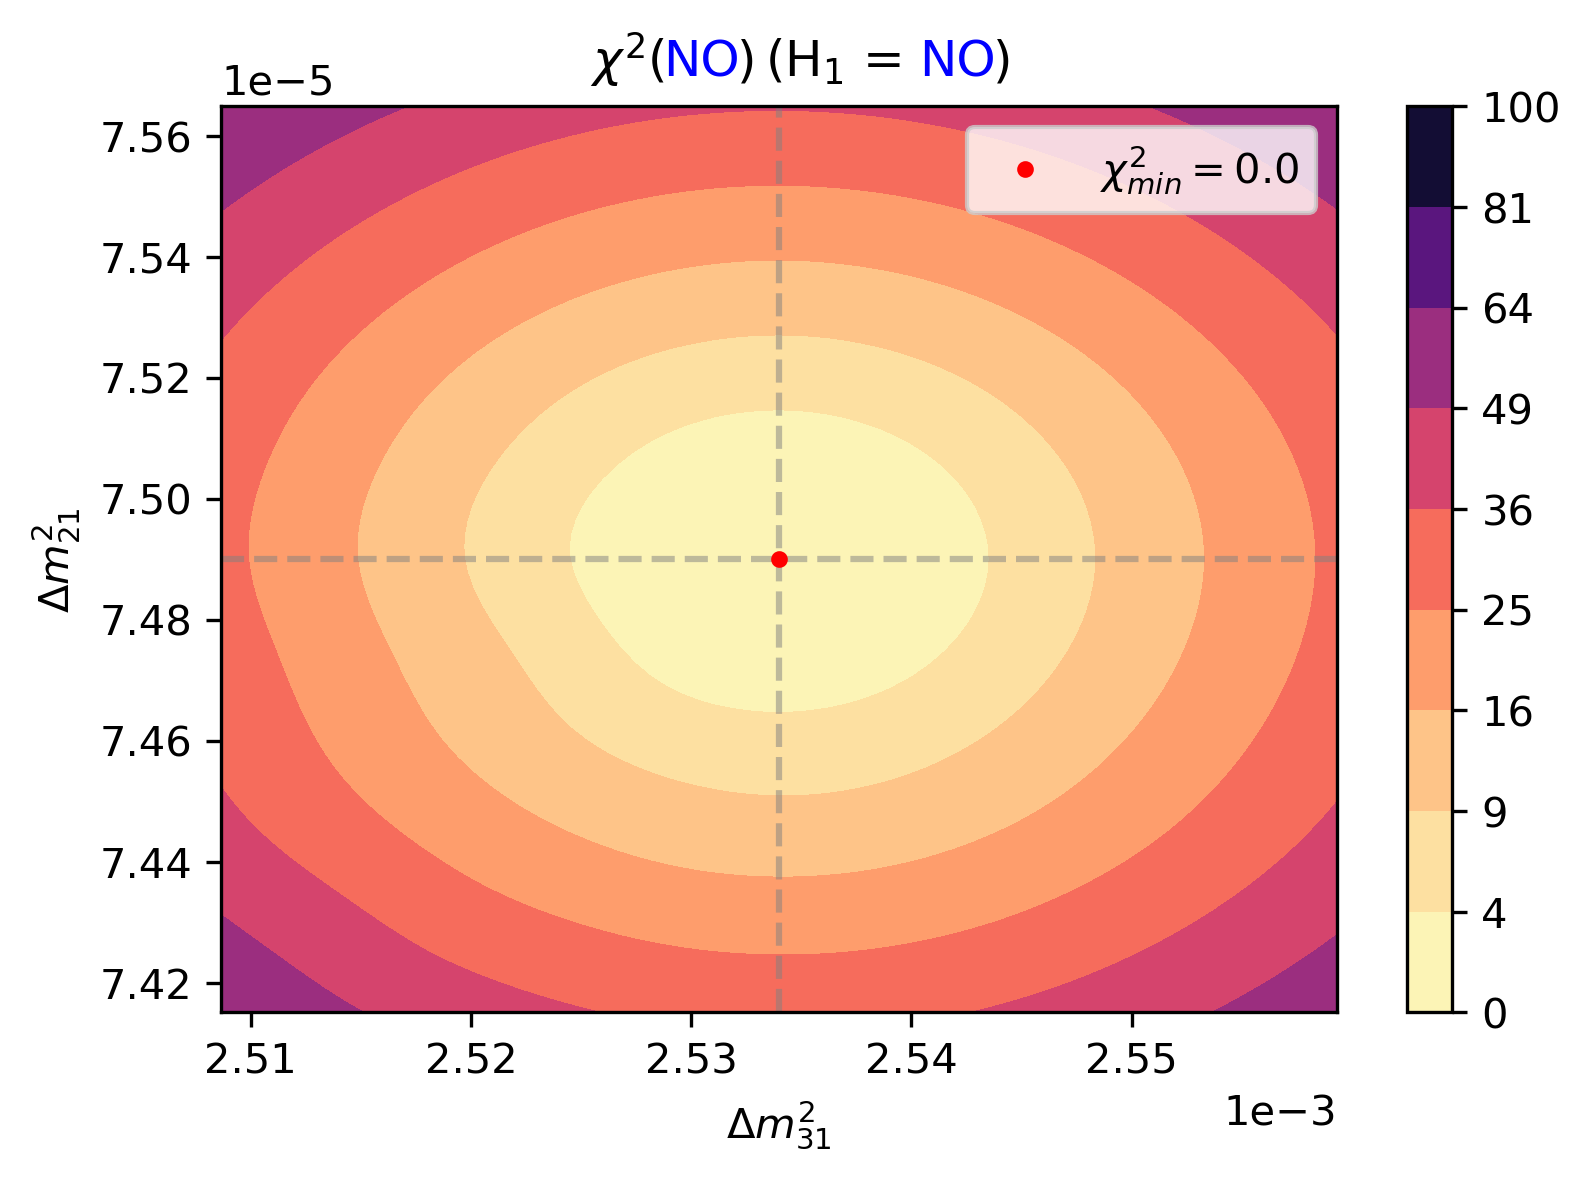

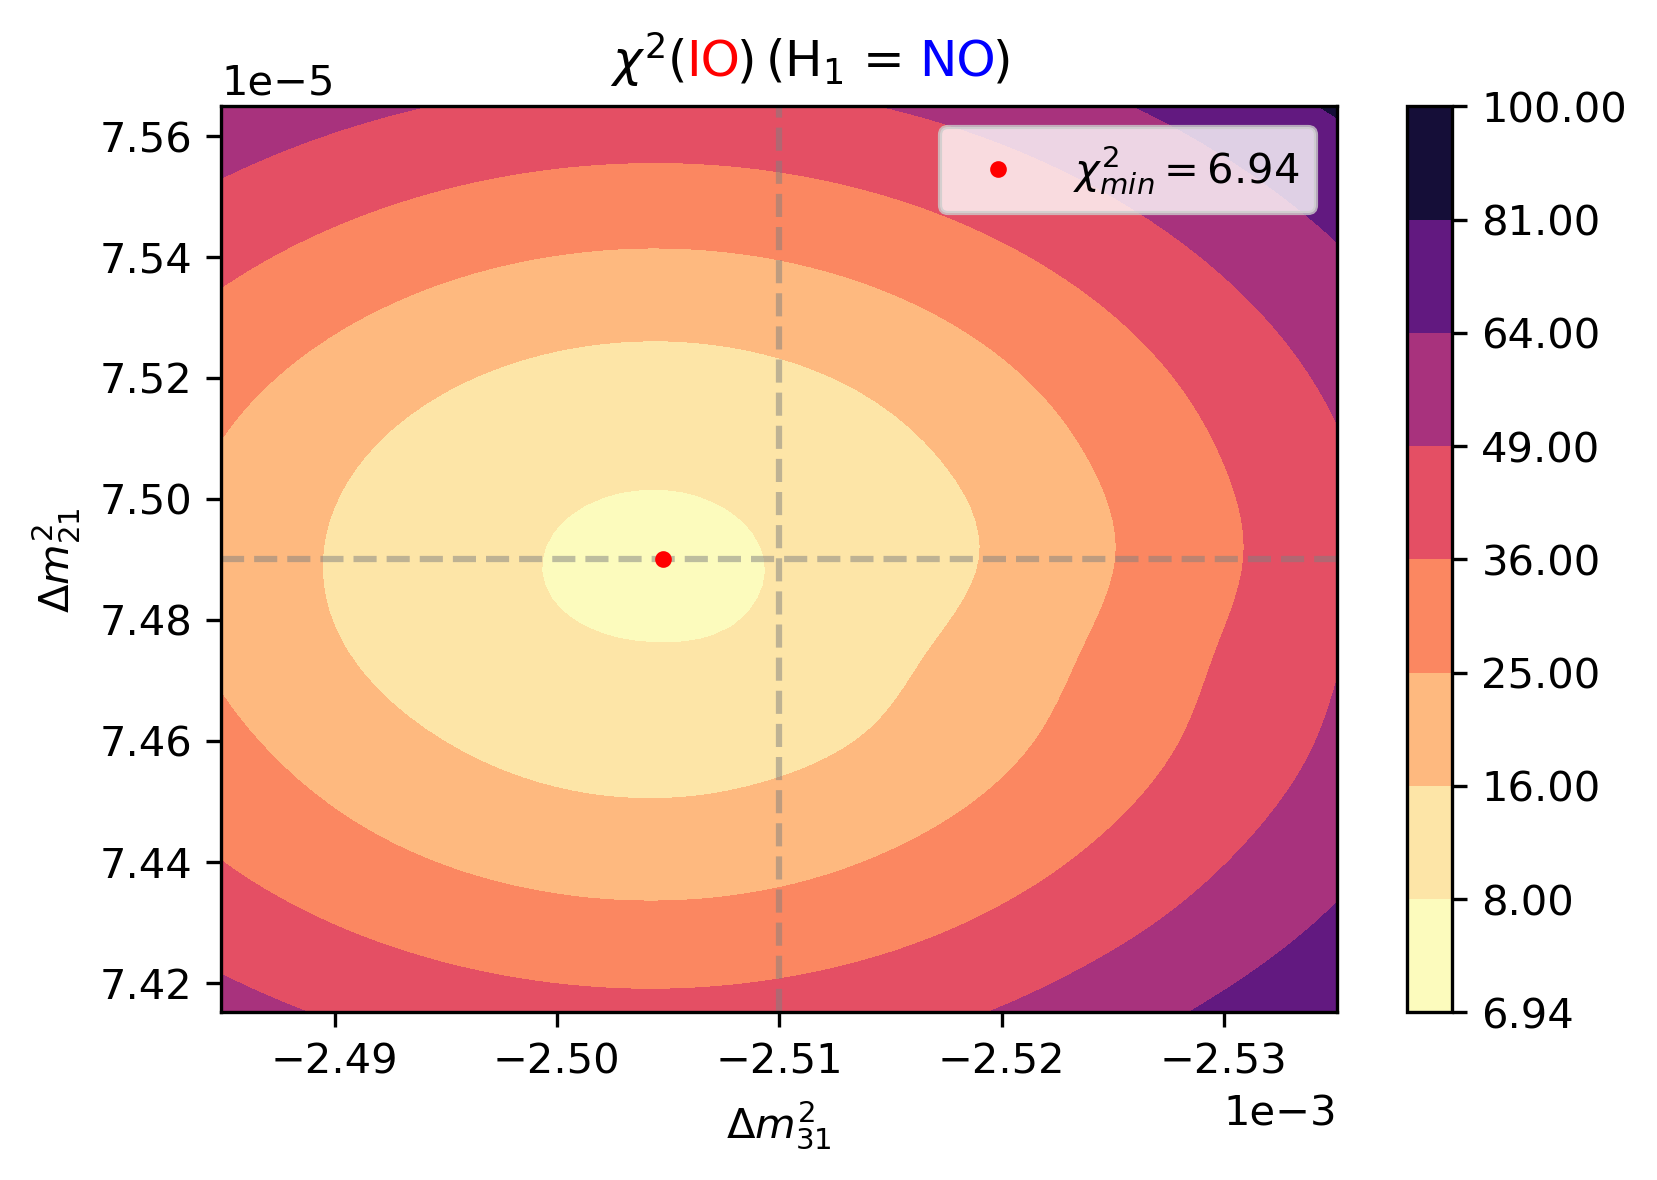

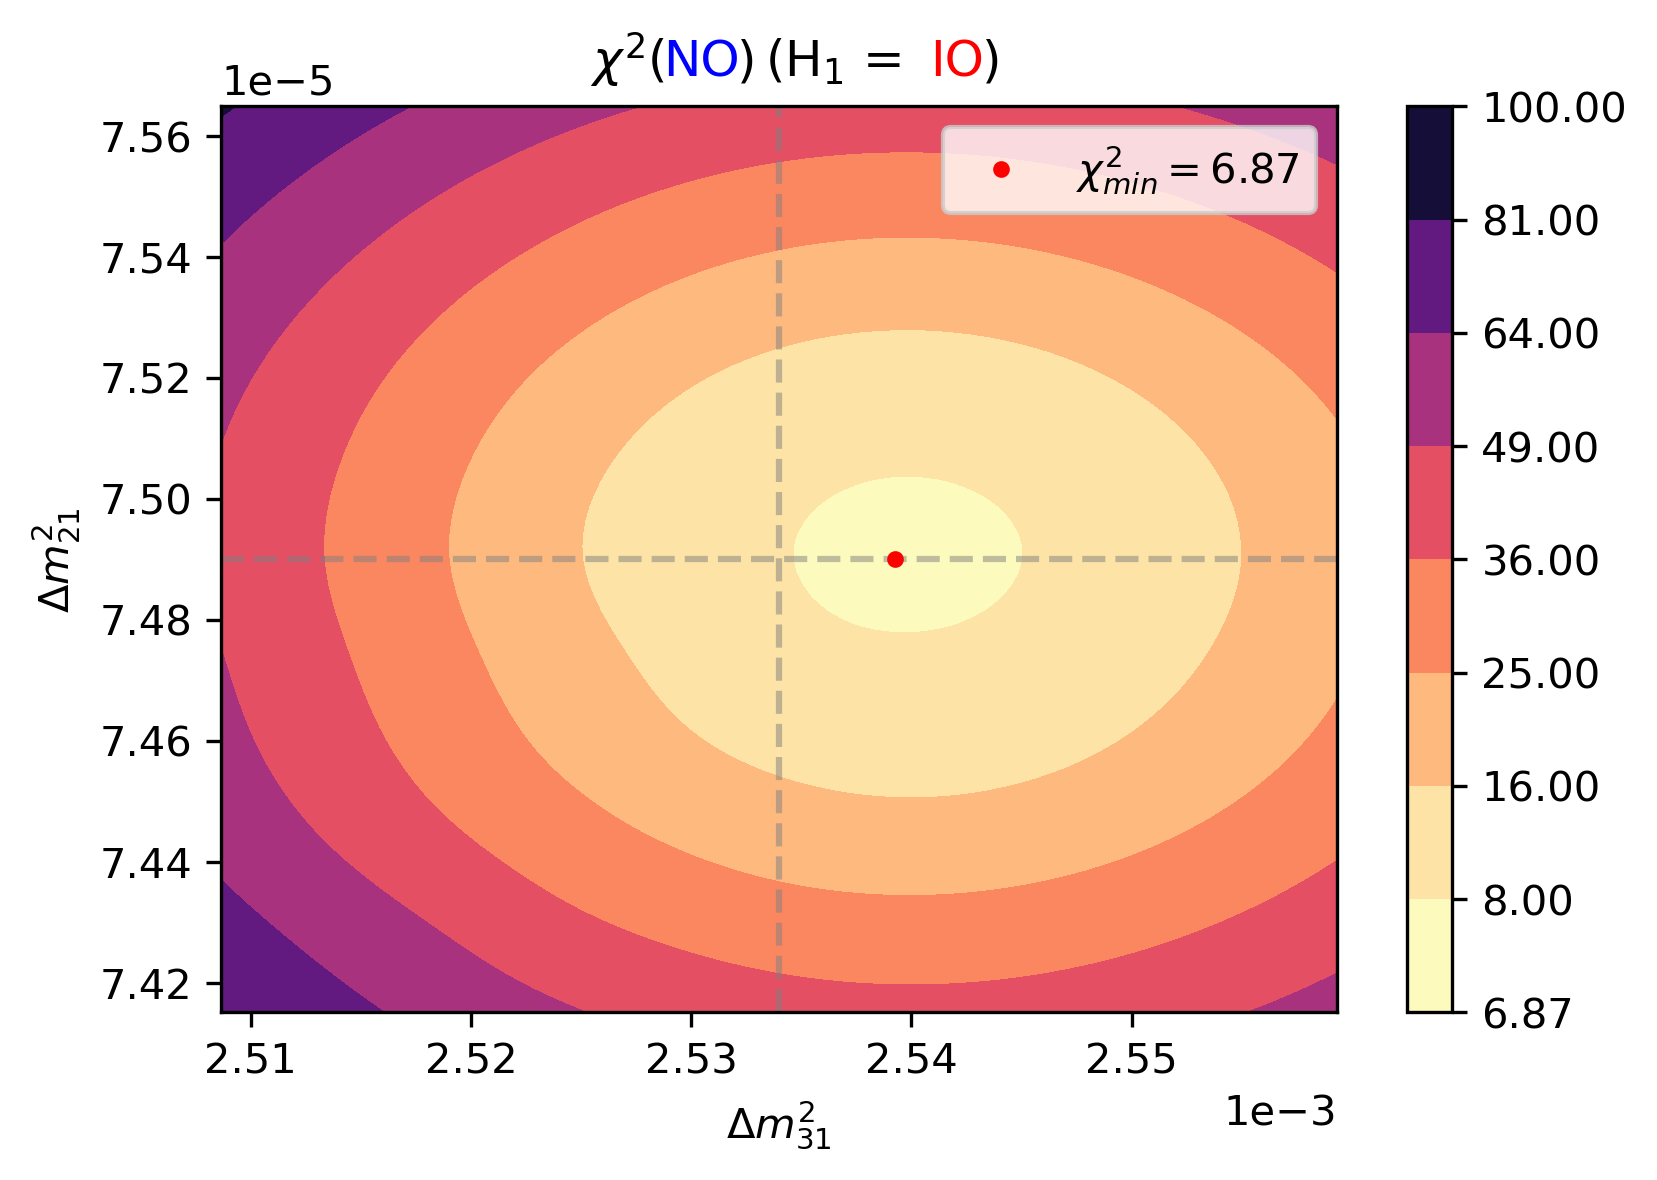

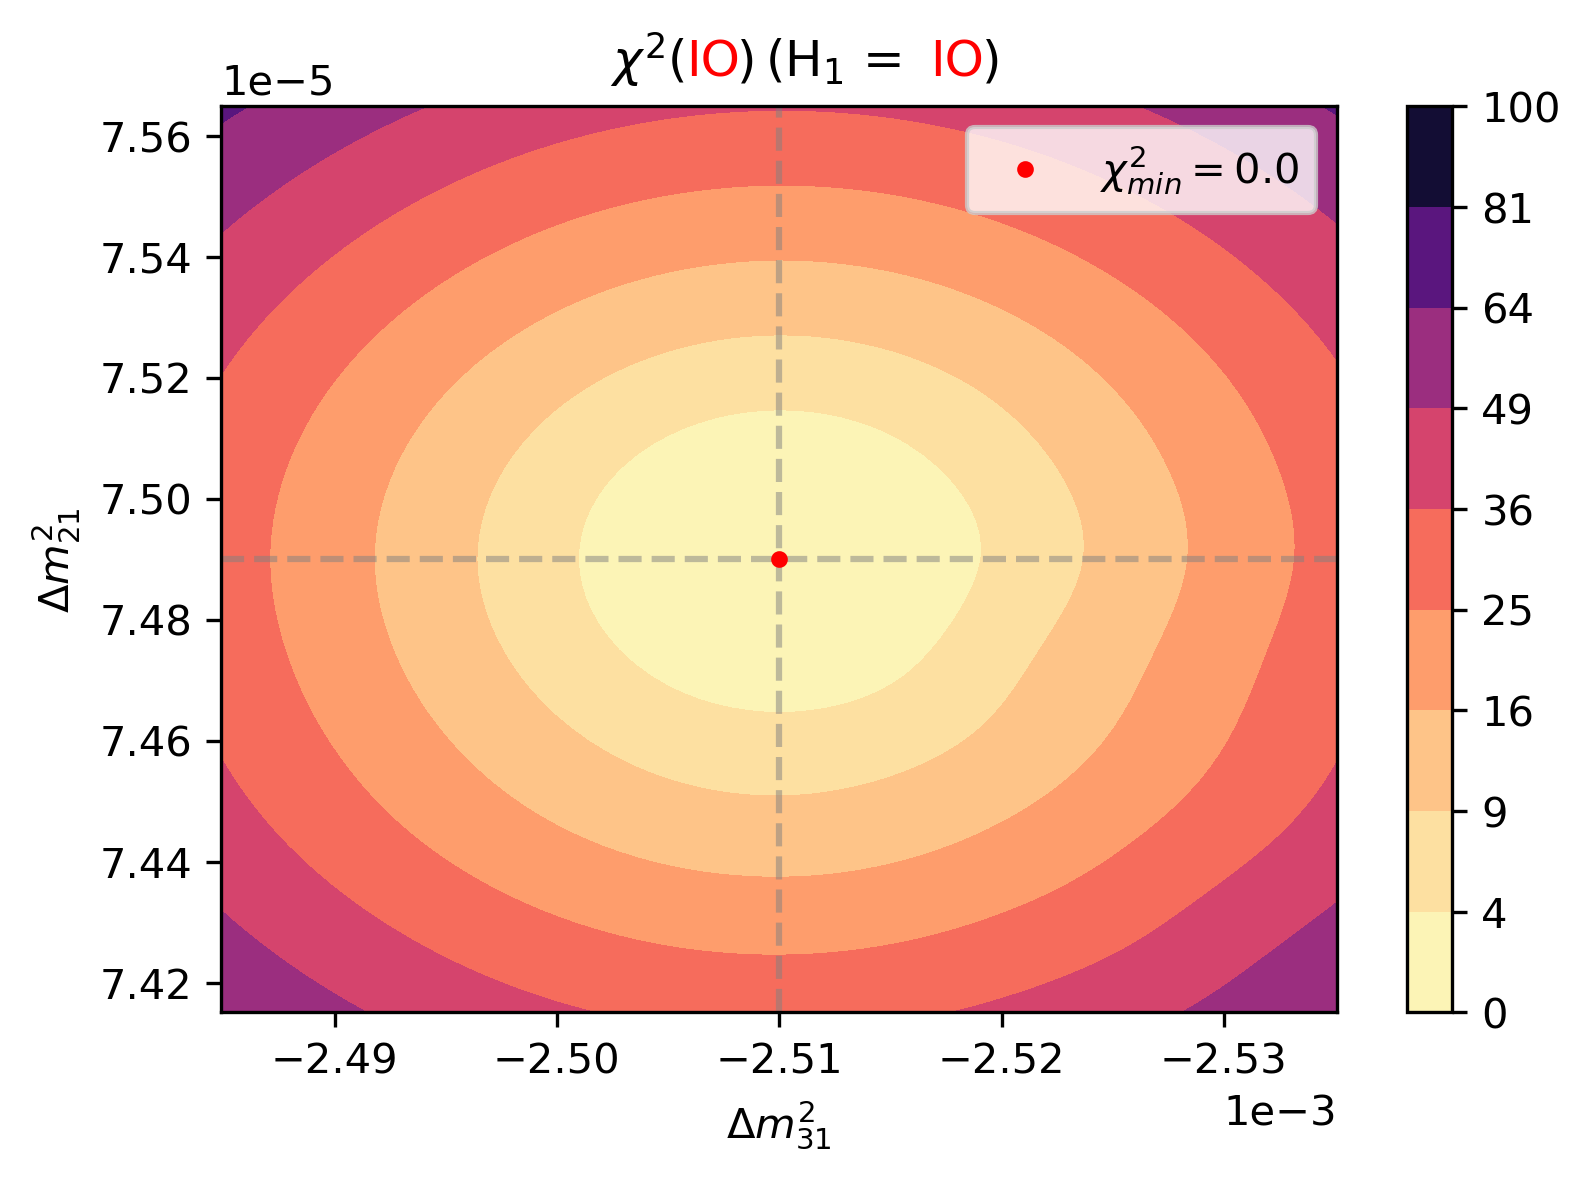

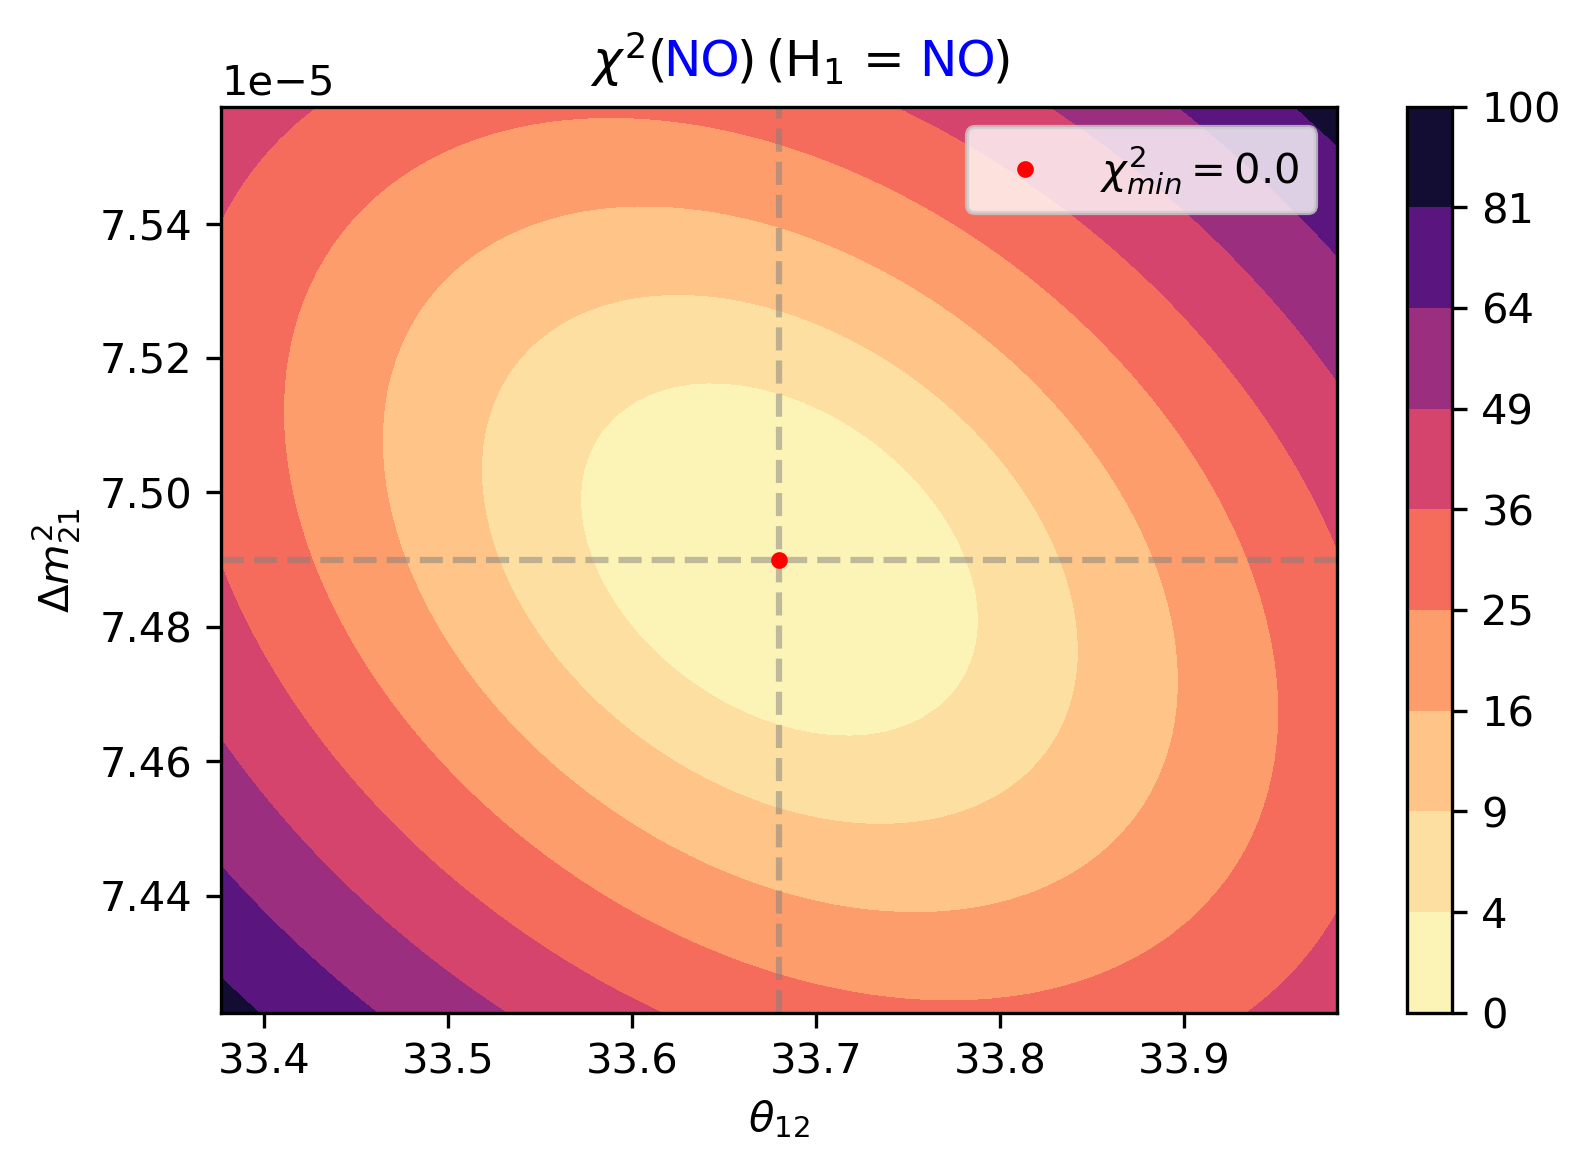

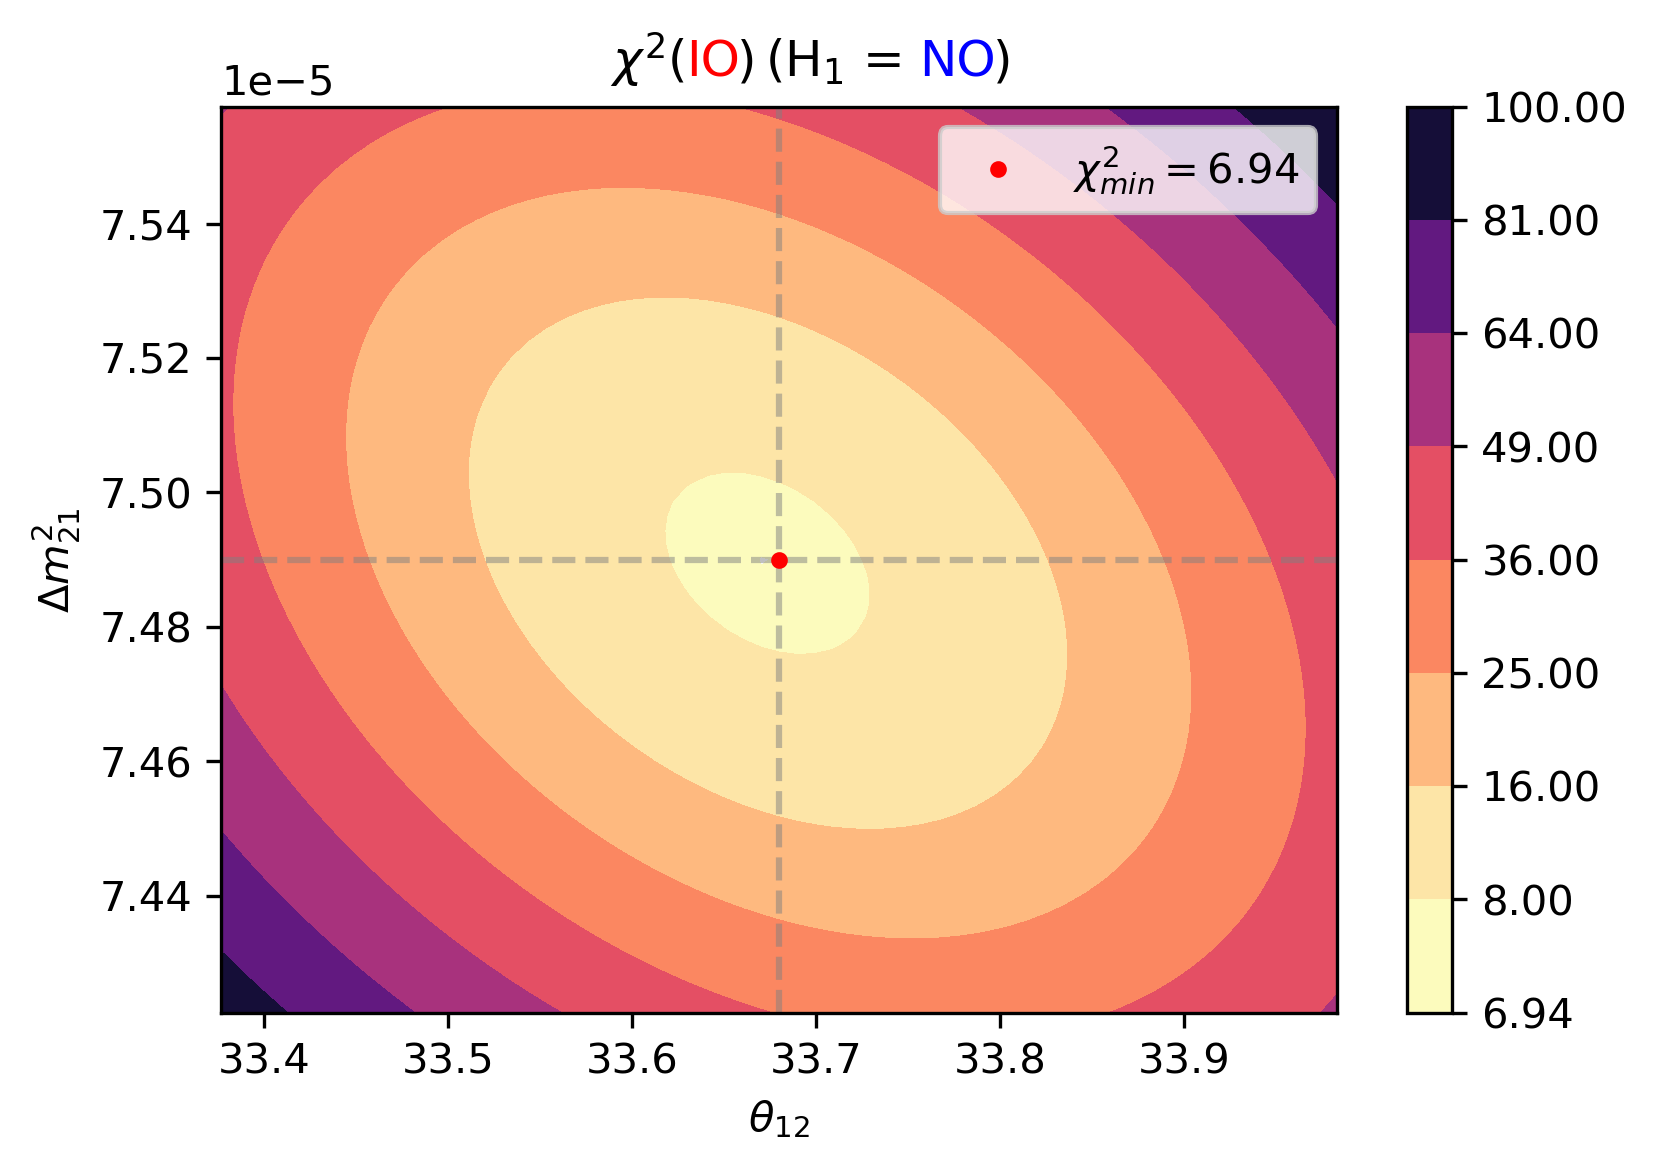

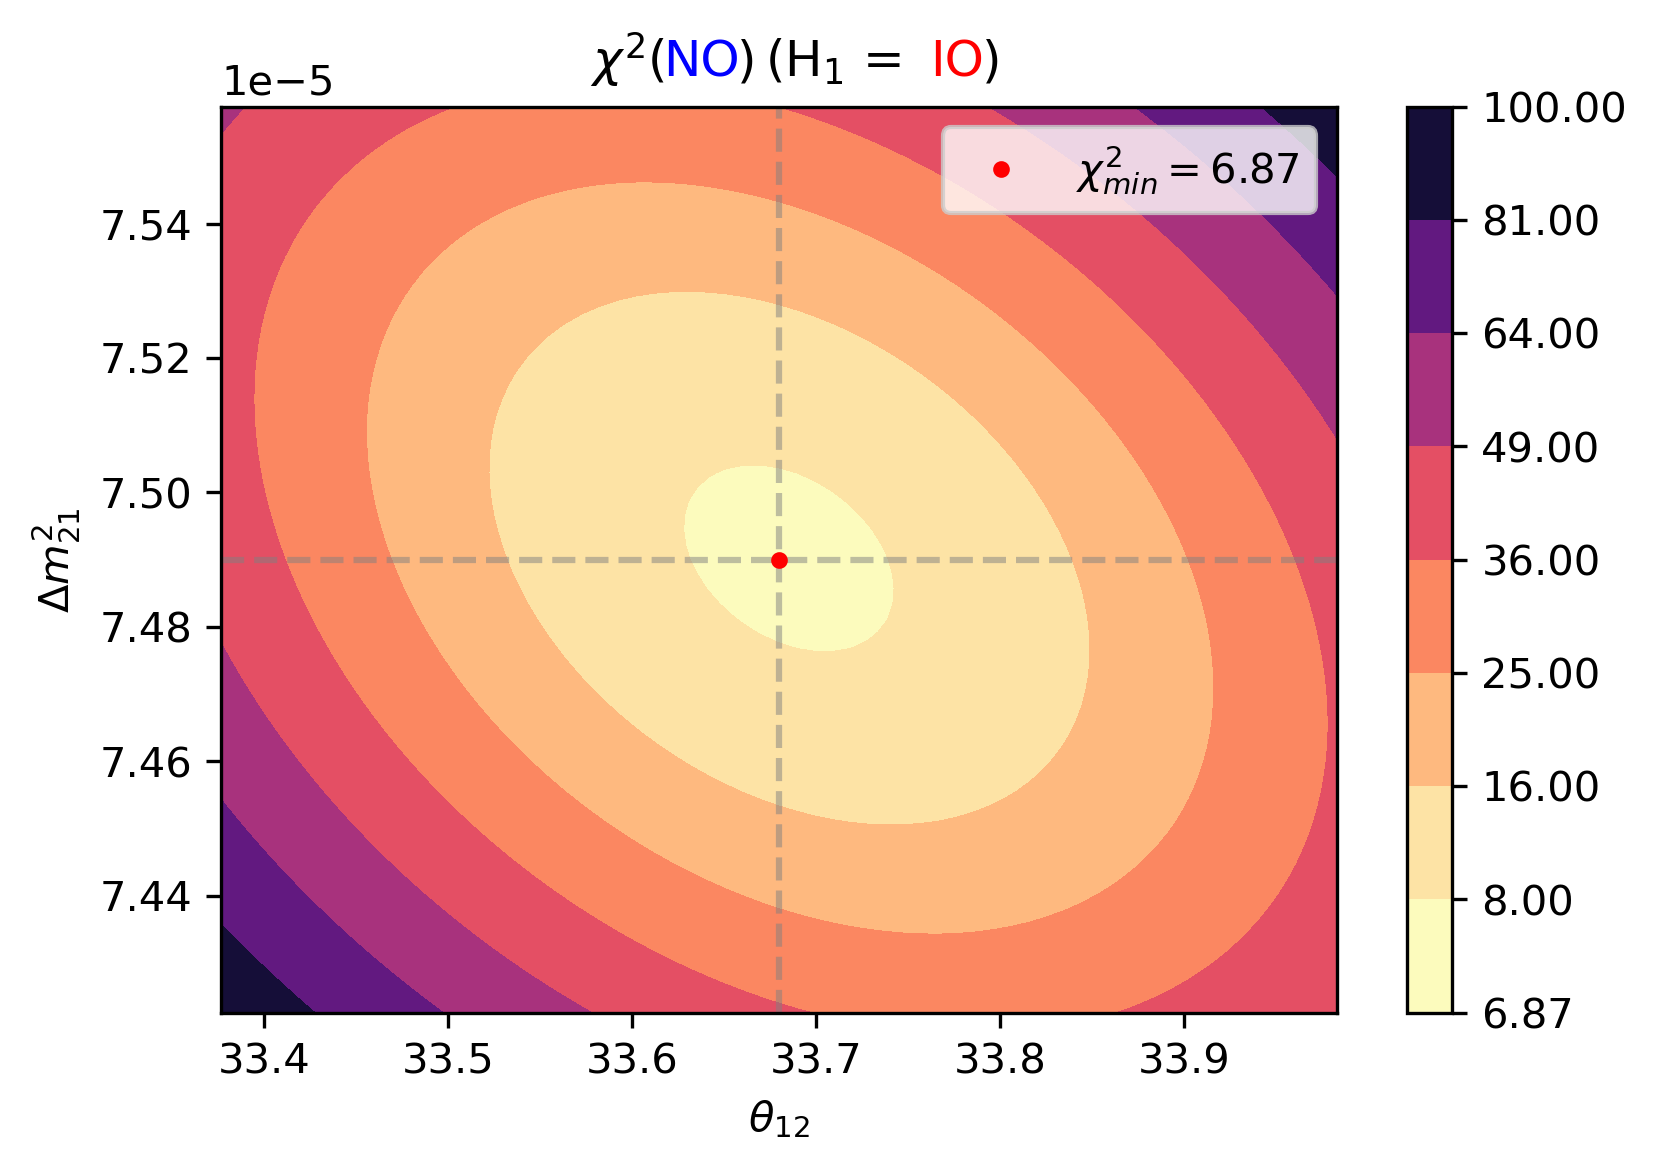

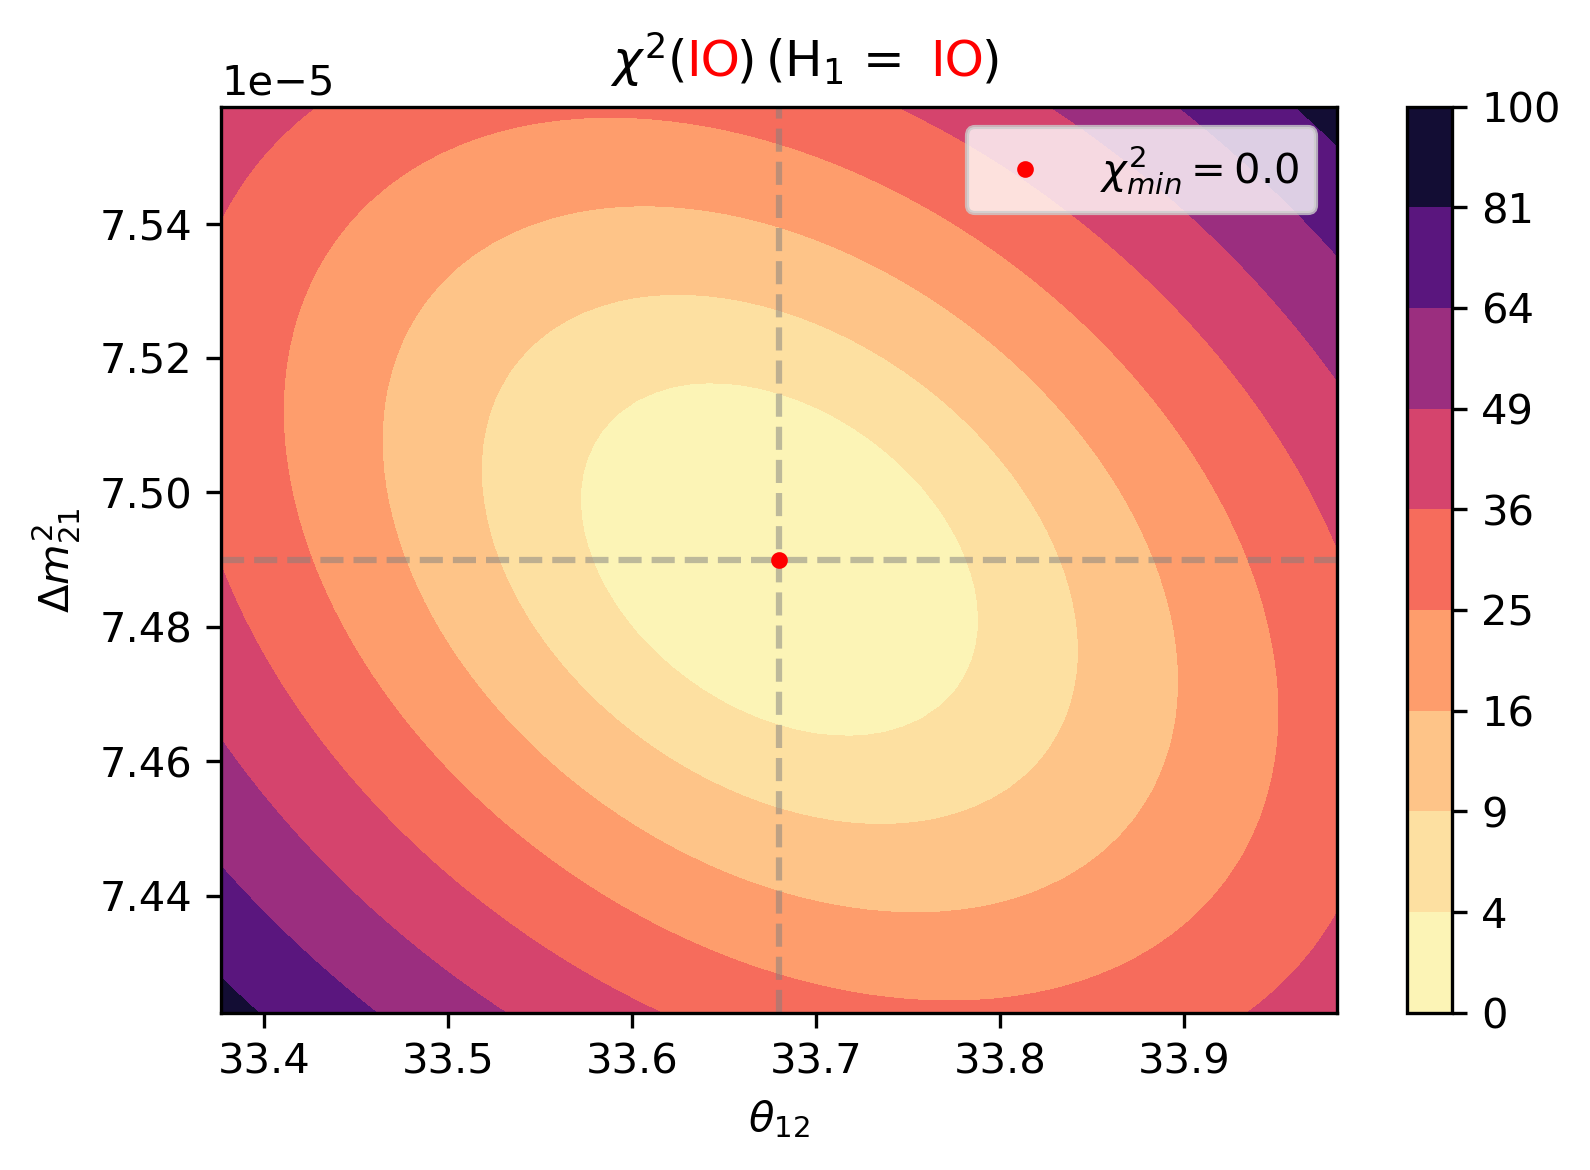

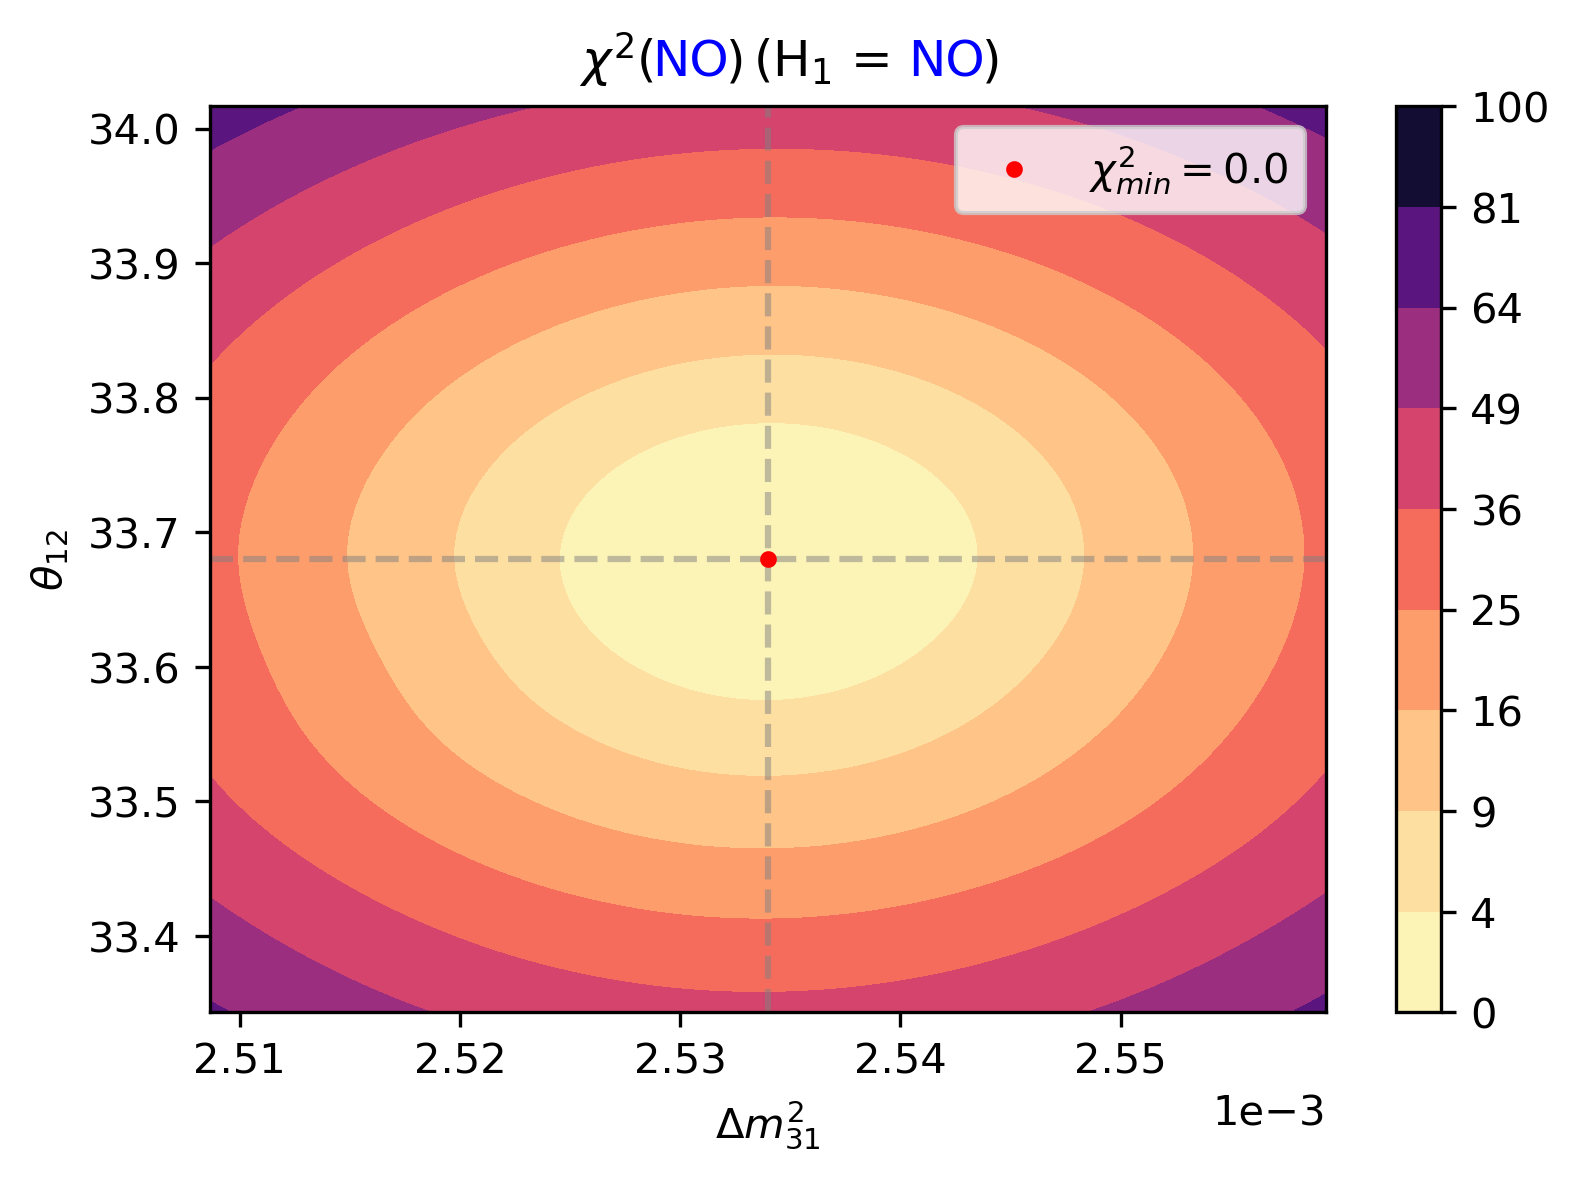

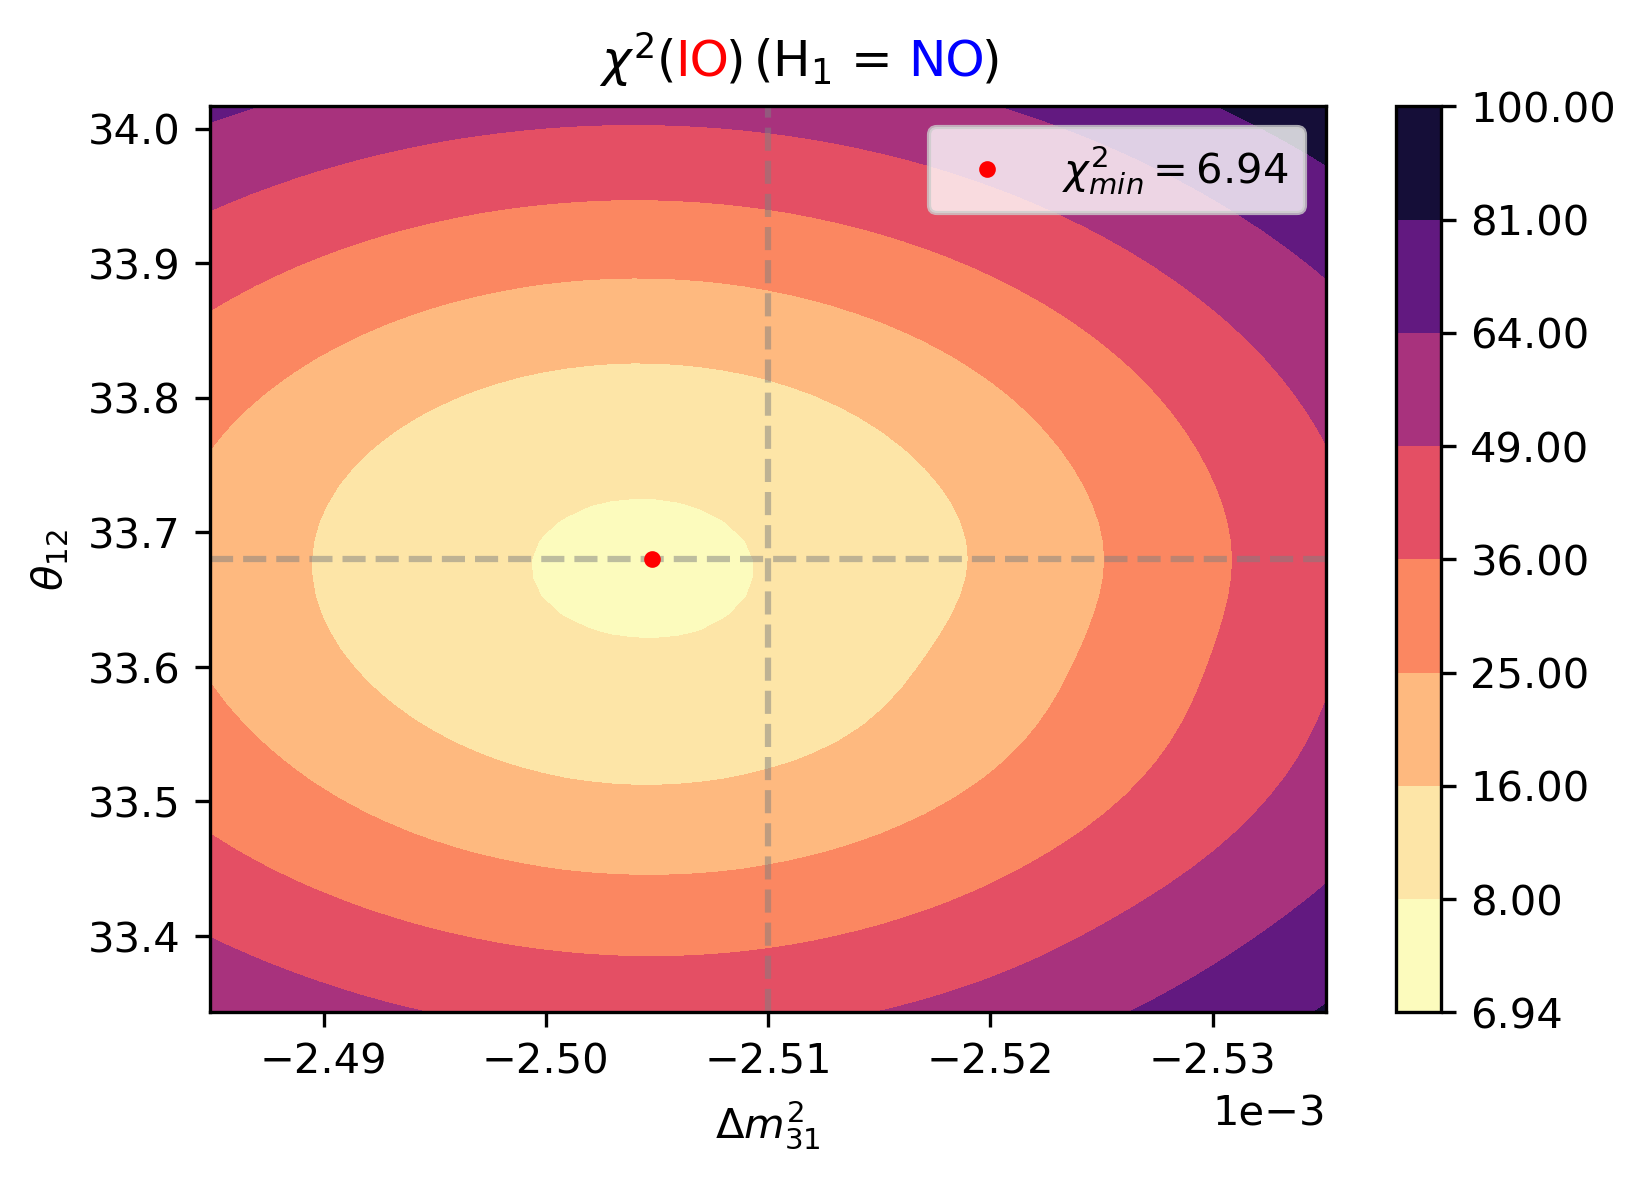

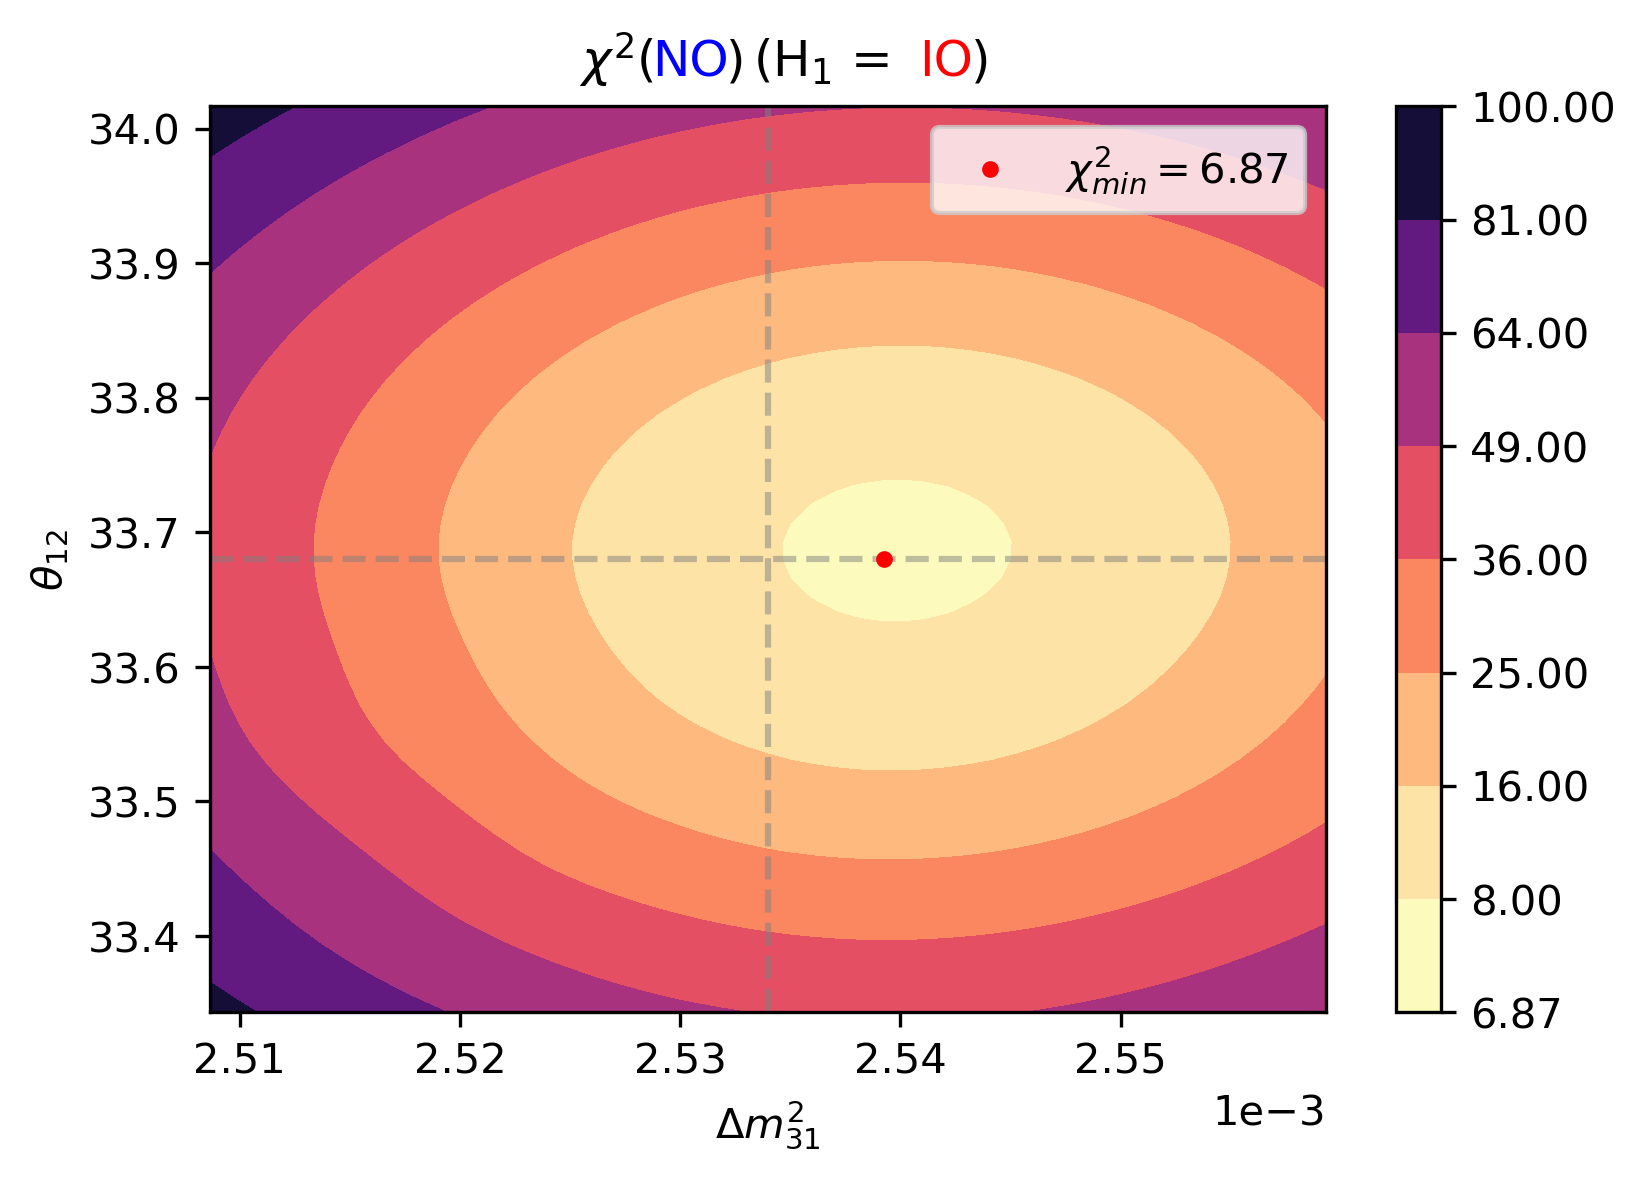

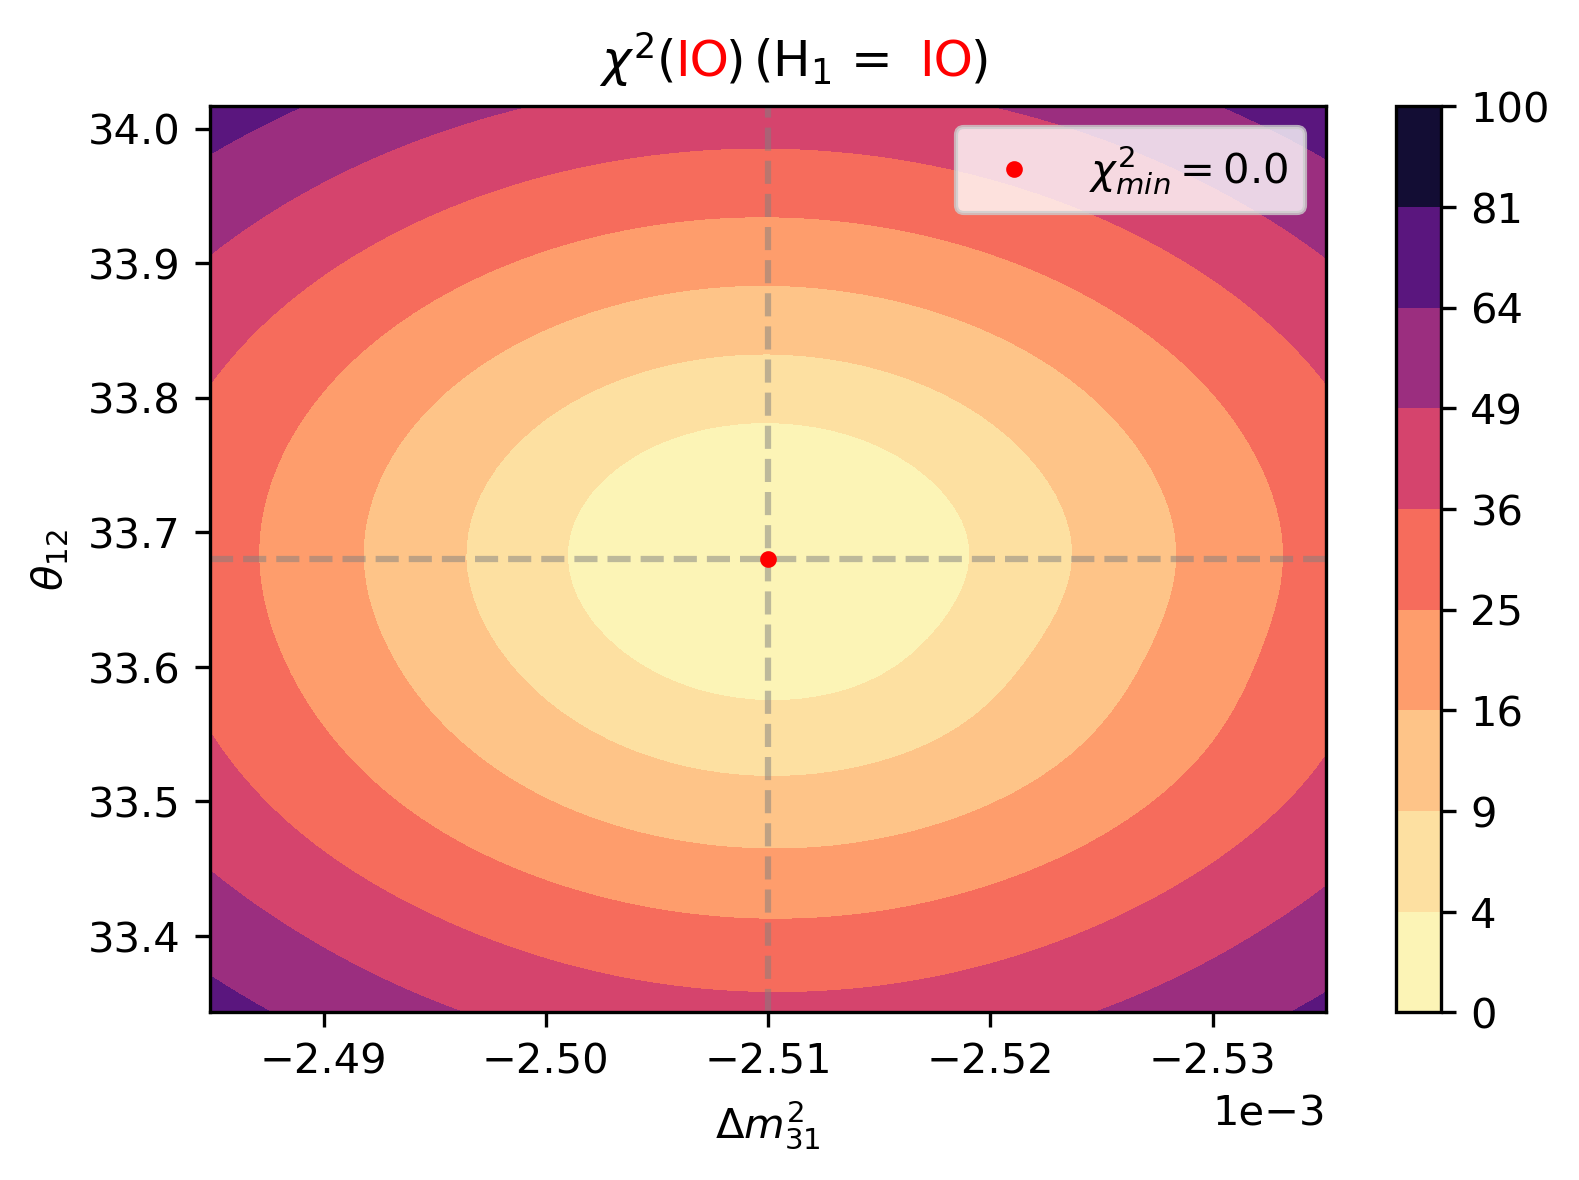

In [50]:
# Loading pre-computed χ² arrays 
chi2_TONO_tNO = np.load('chi2_TONO_tNO.npy')
chi2_TONO_tIO = np.load('chi2_TONO_tIO.npy')
chi2_TOIO_tNO = np.load('chi2_TOIO_tNO.npy')
chi2_TOIO_tIO = np.load('chi2_TOIO_tIO.npy')

# Calling the functions to generate the 2D χ² contour plots and 1D χ² profile plots
contours(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO)

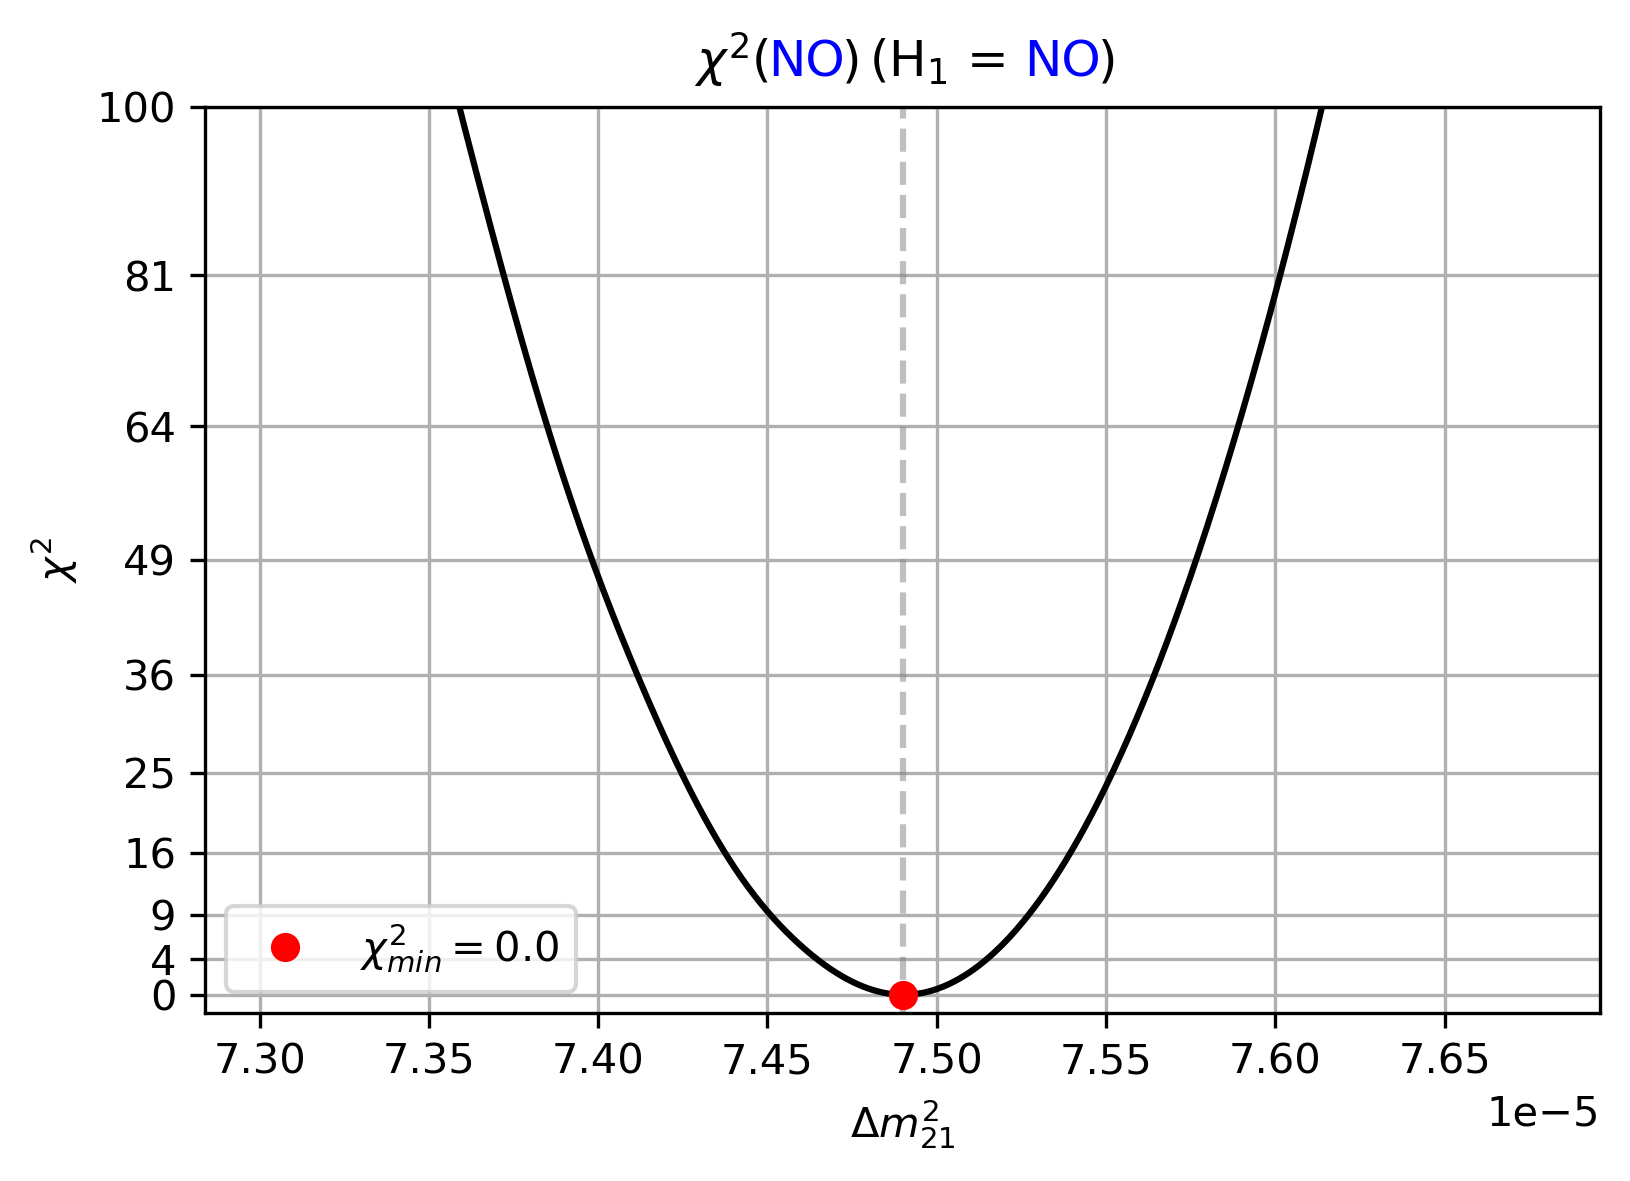

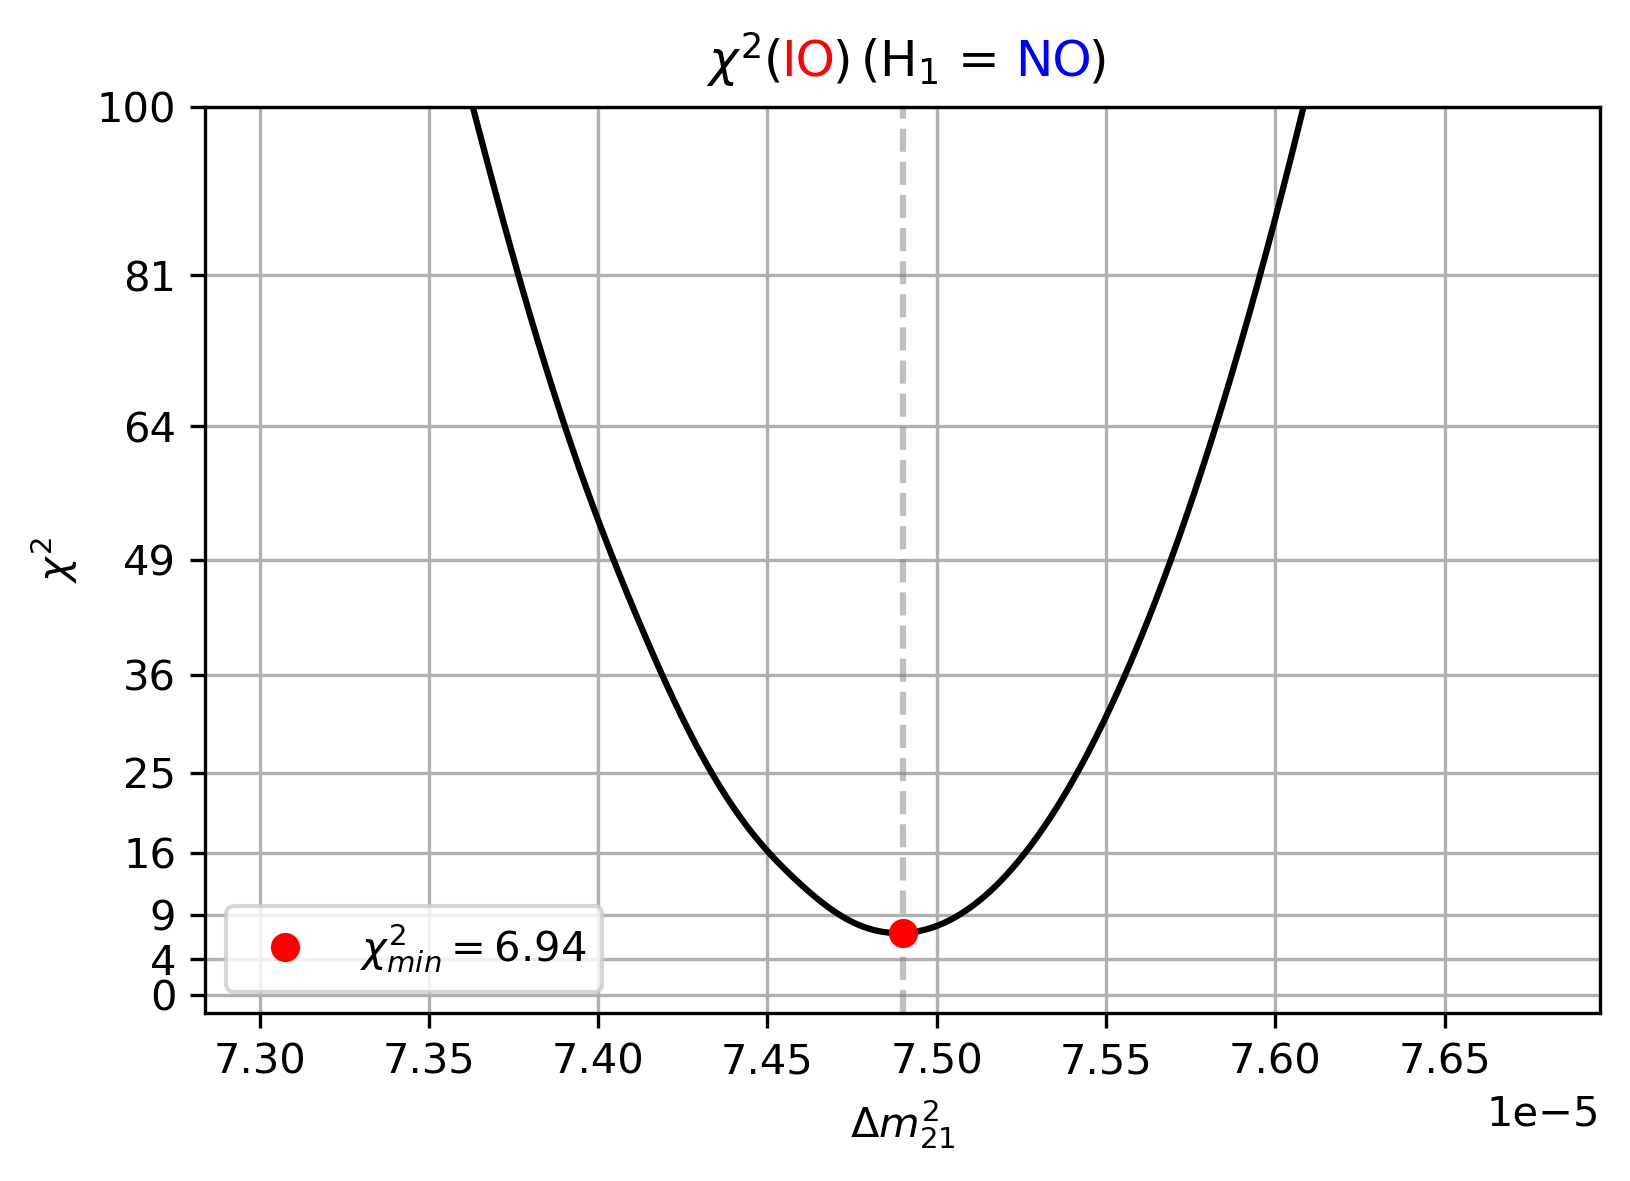

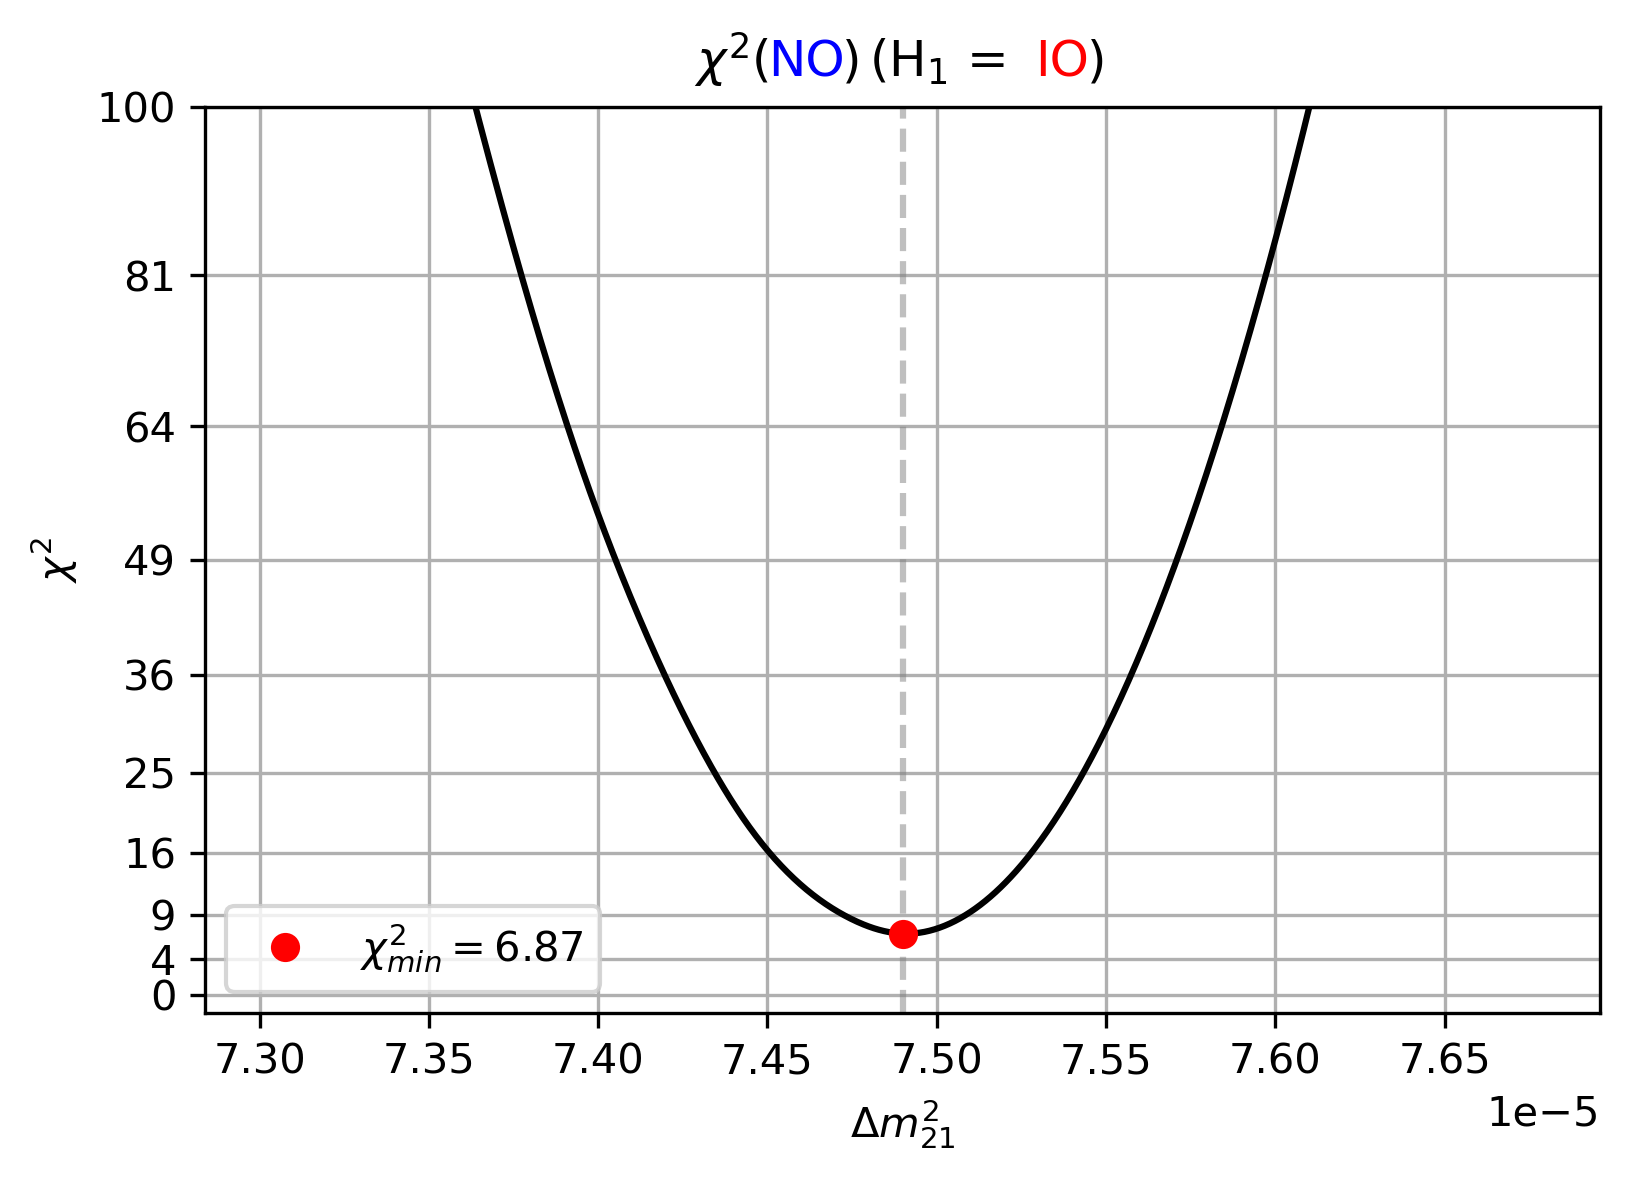

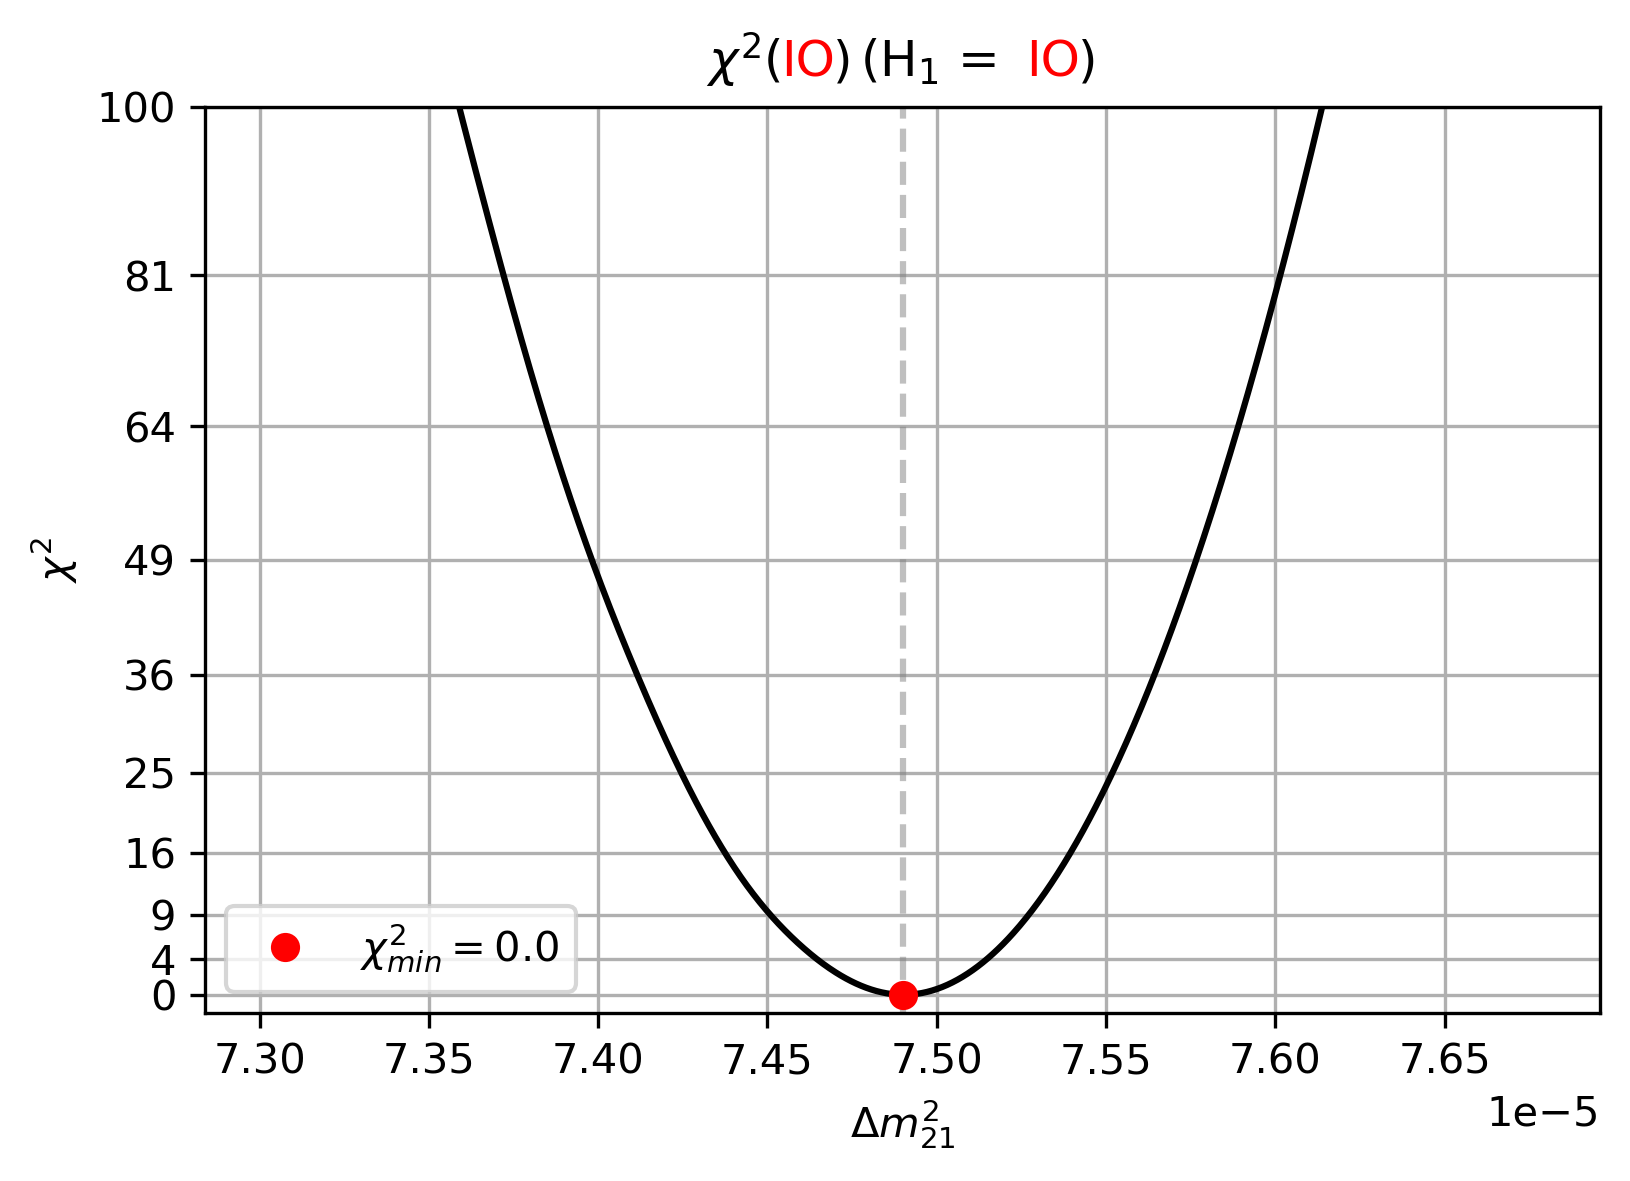

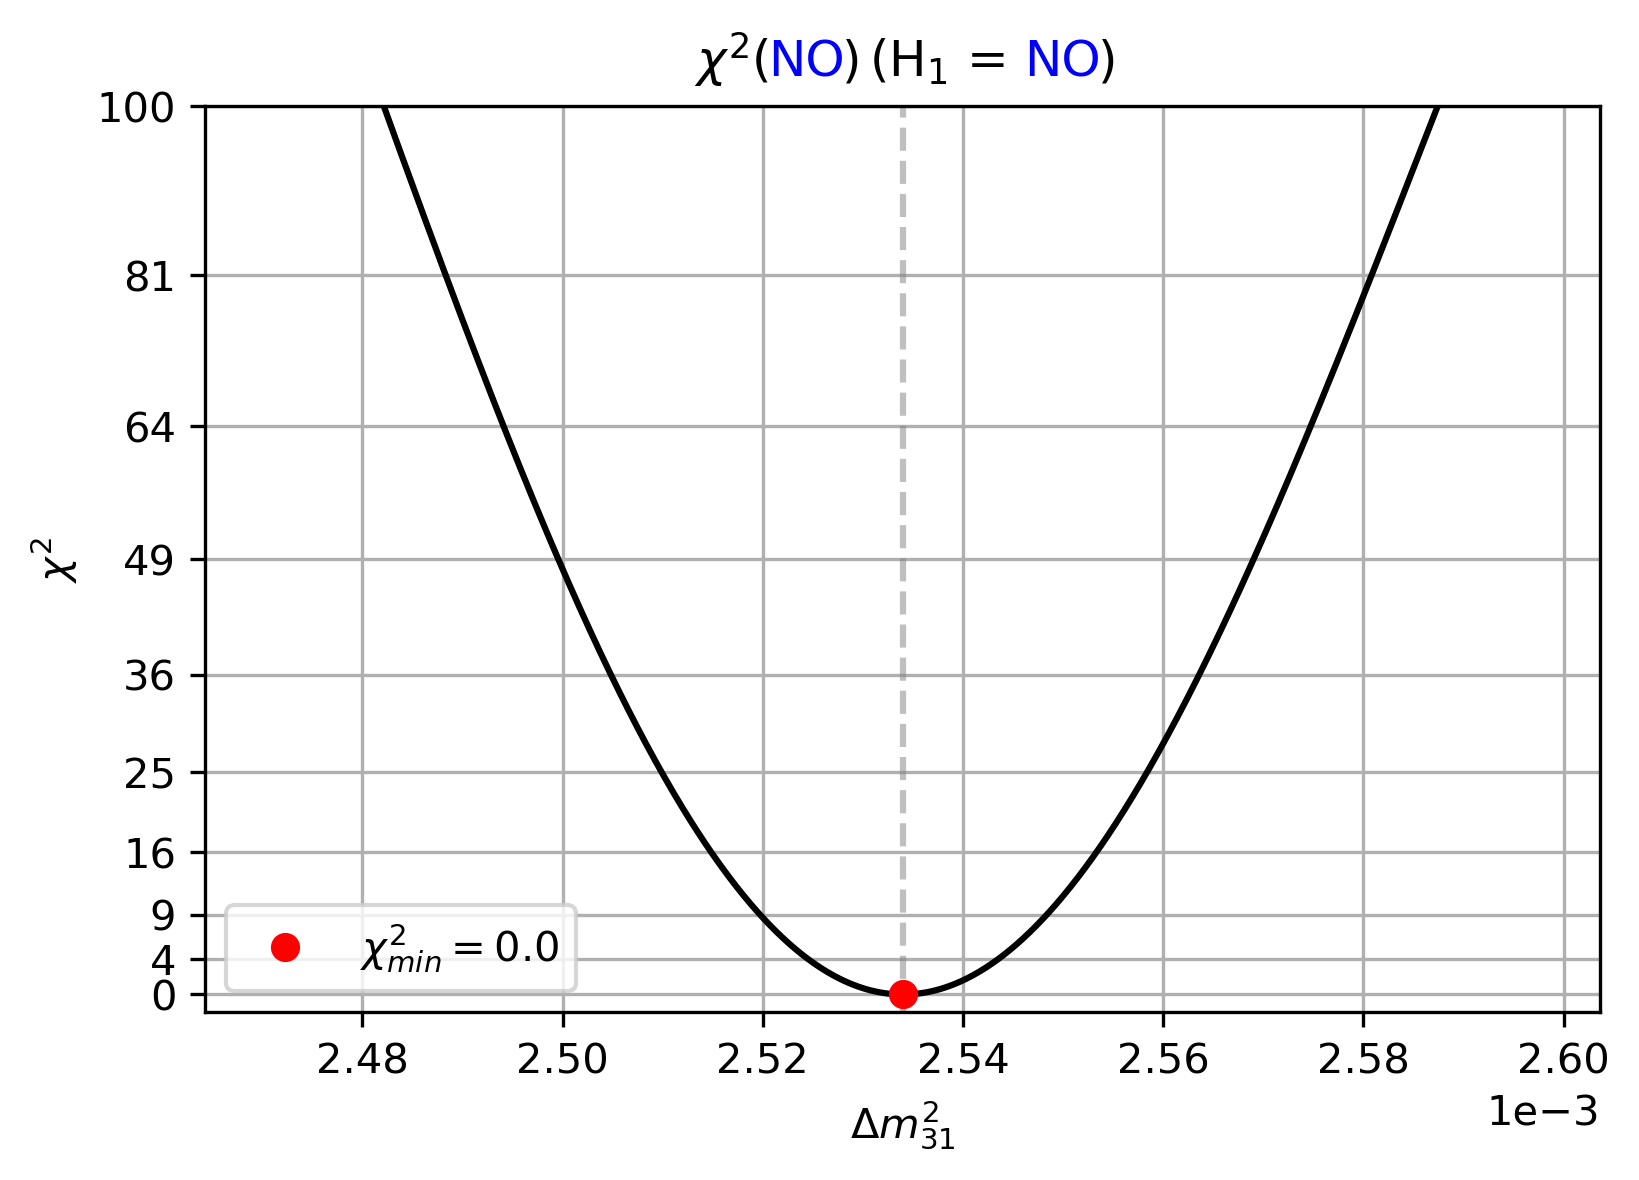

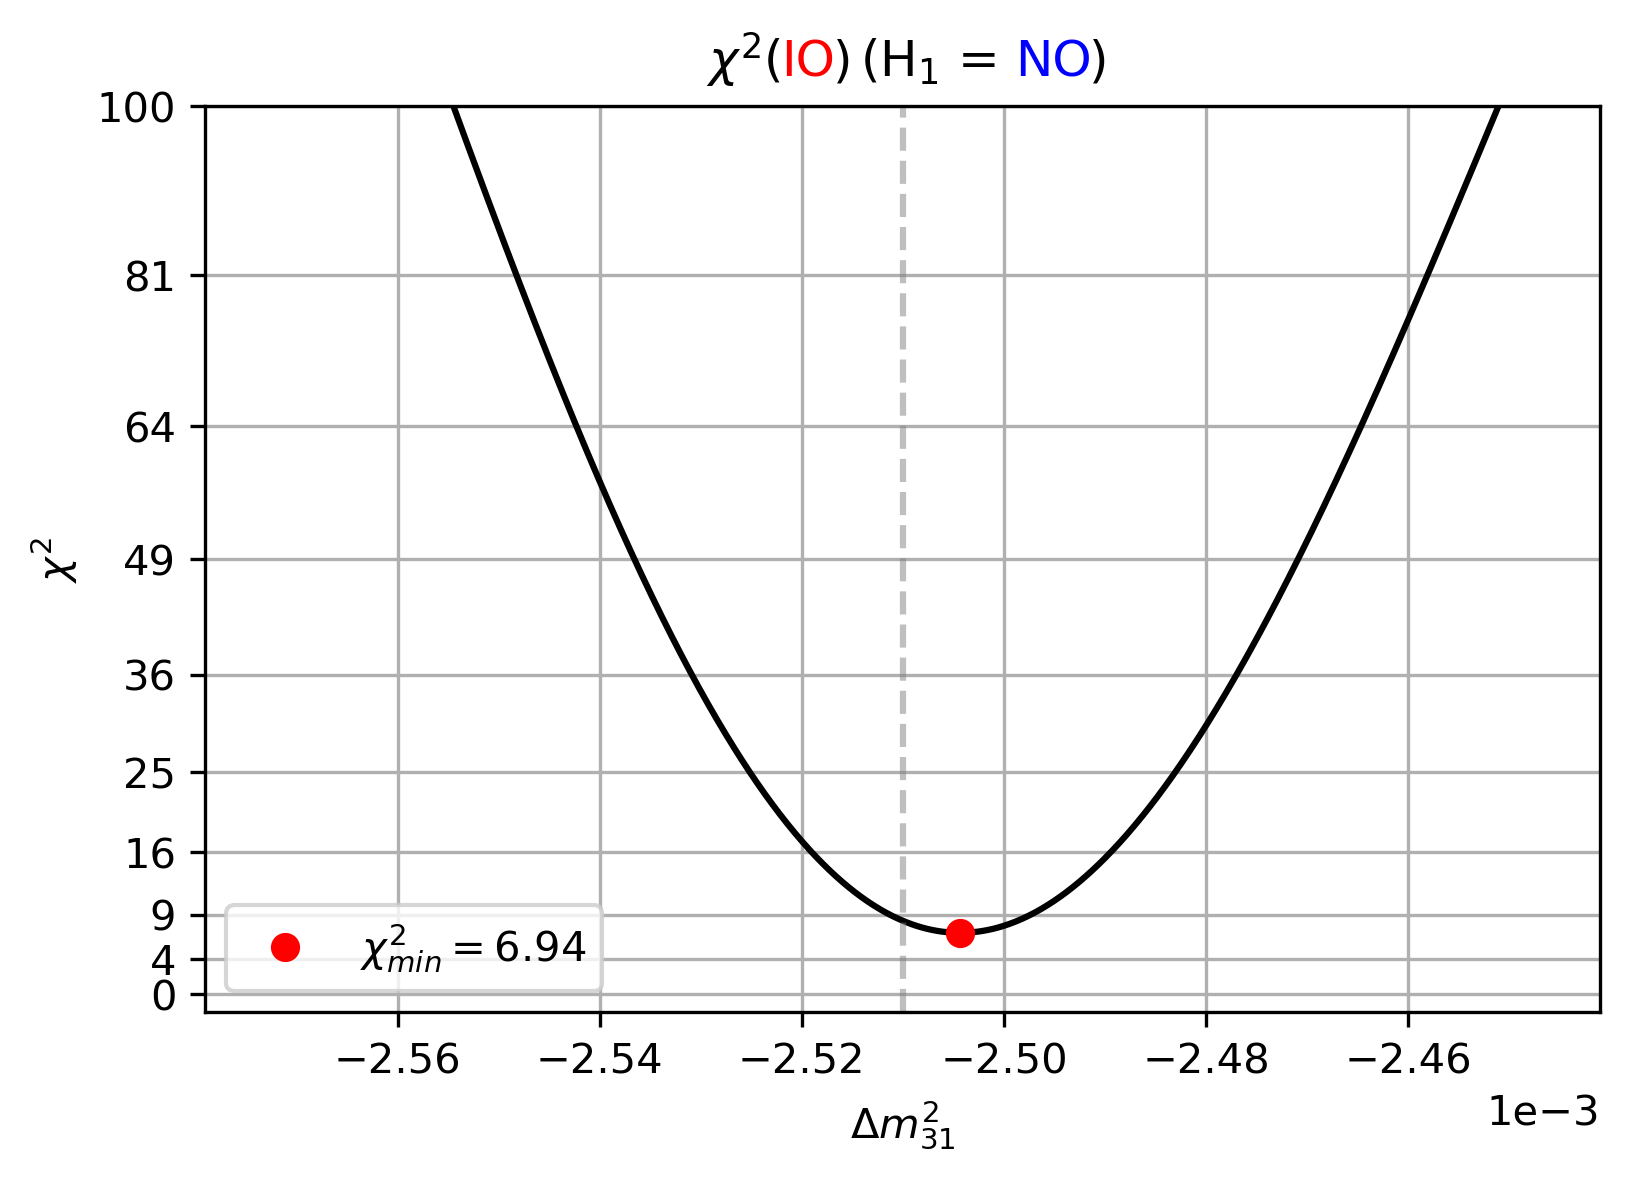

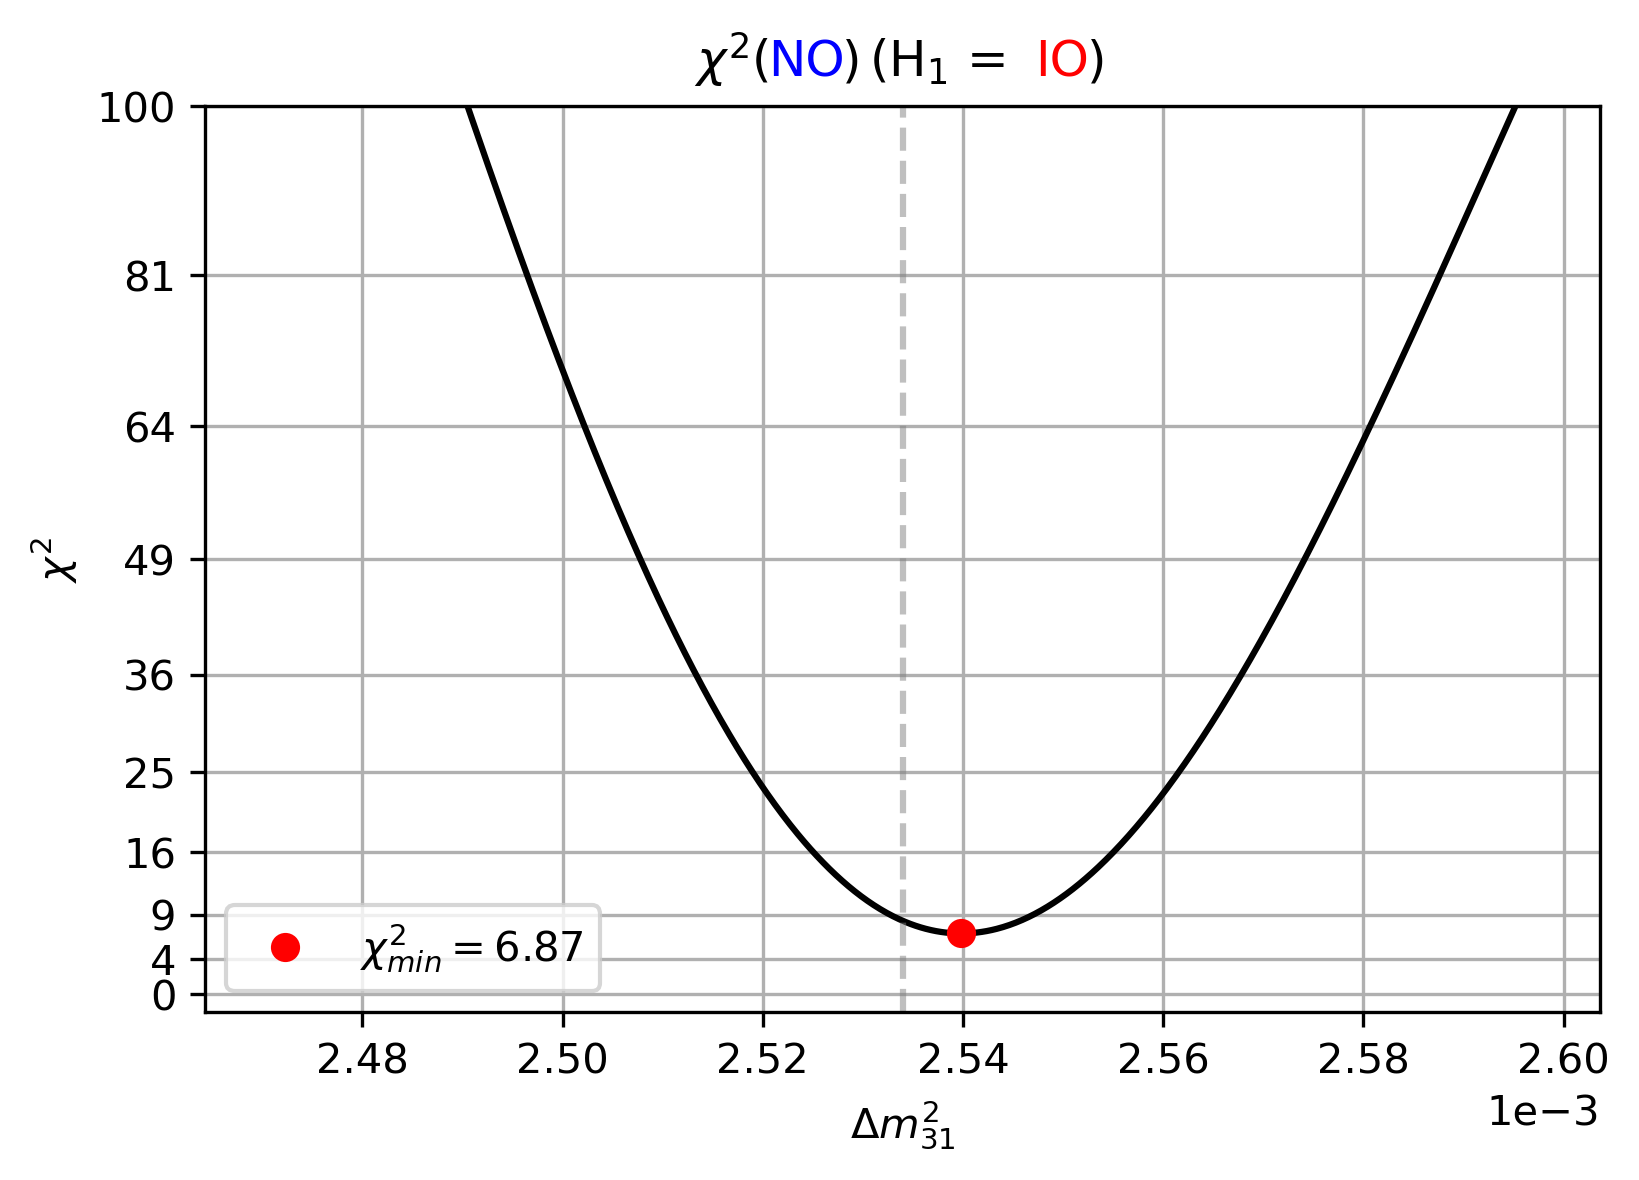

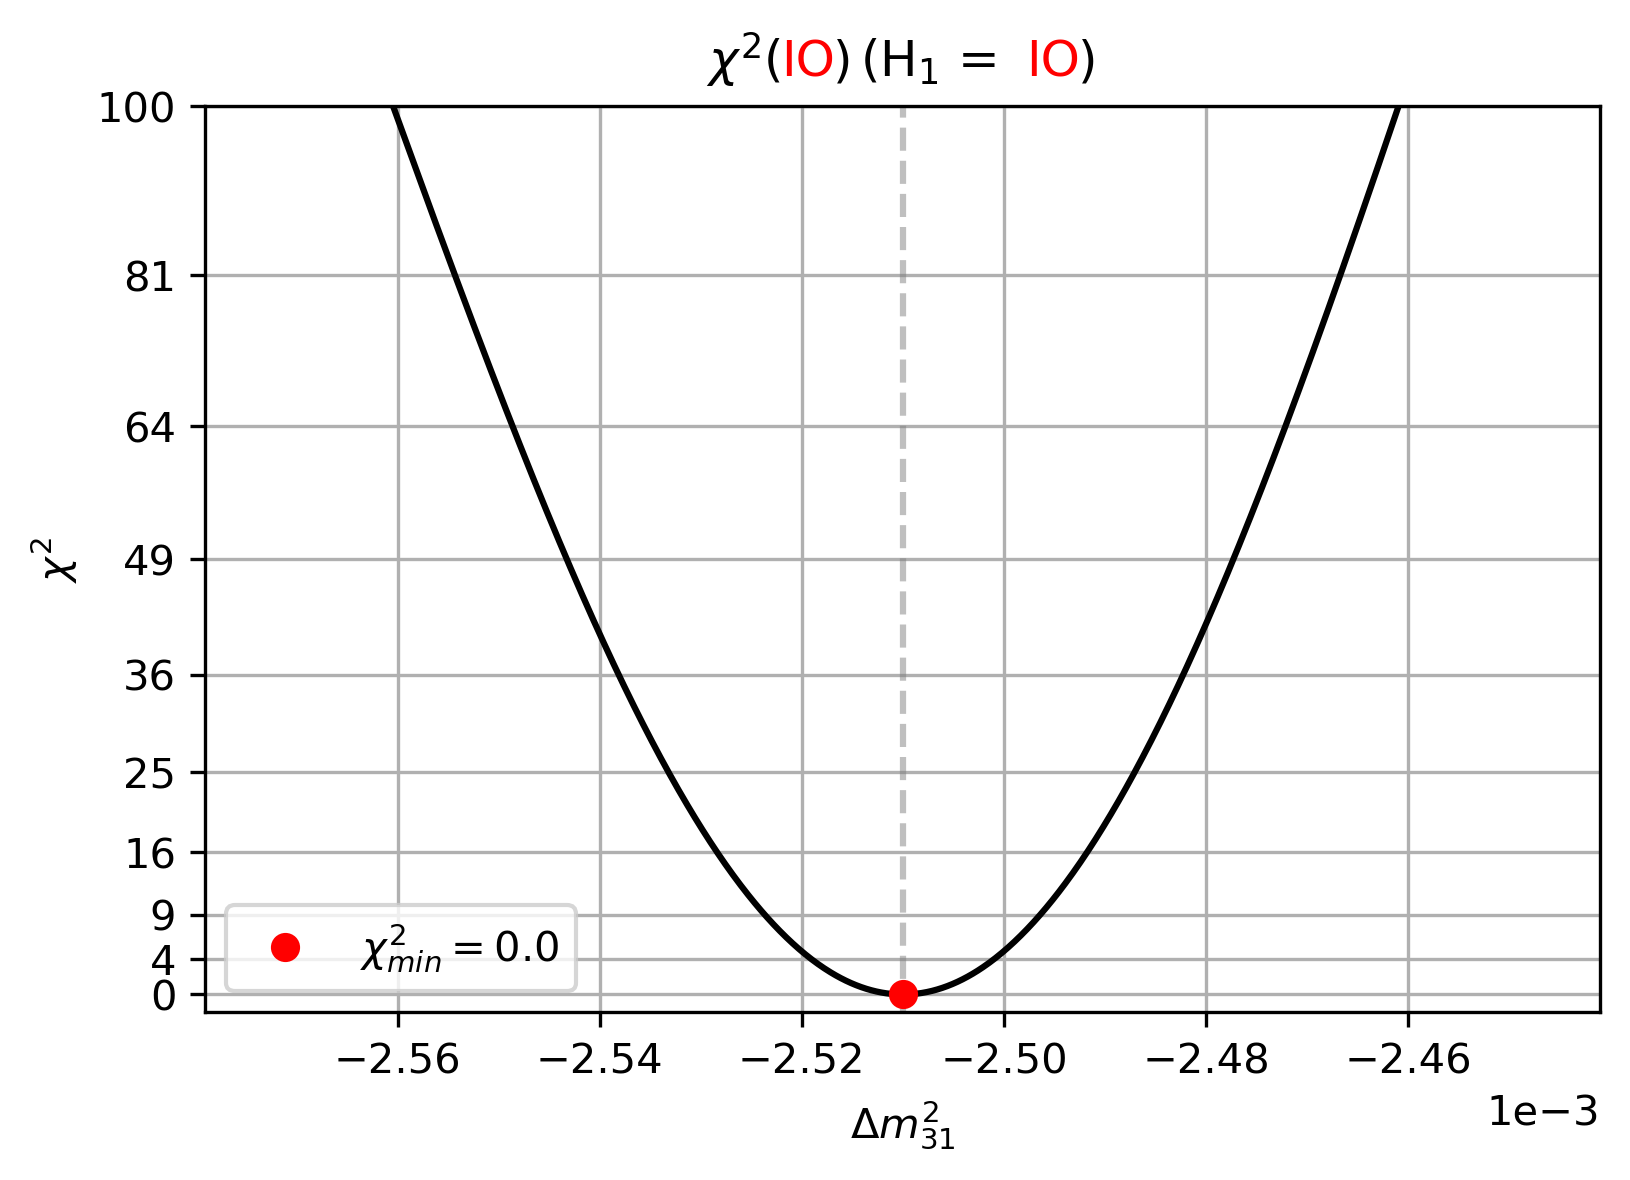

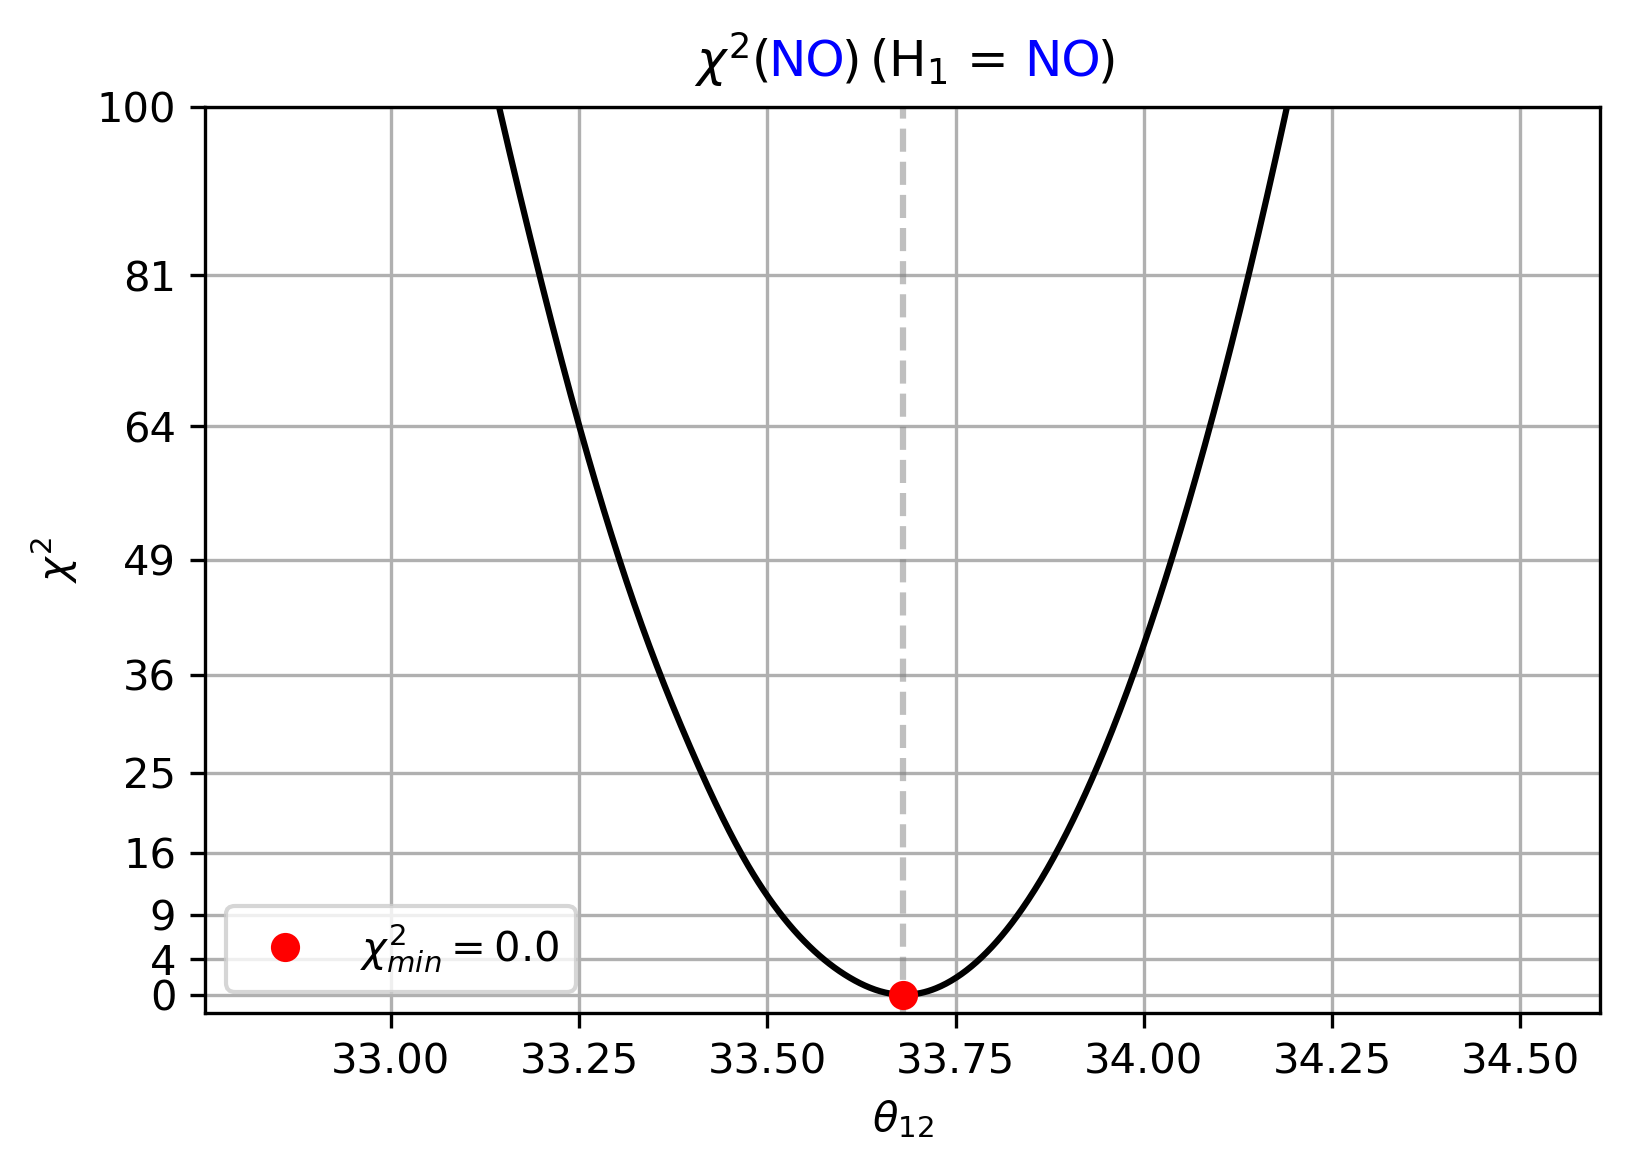

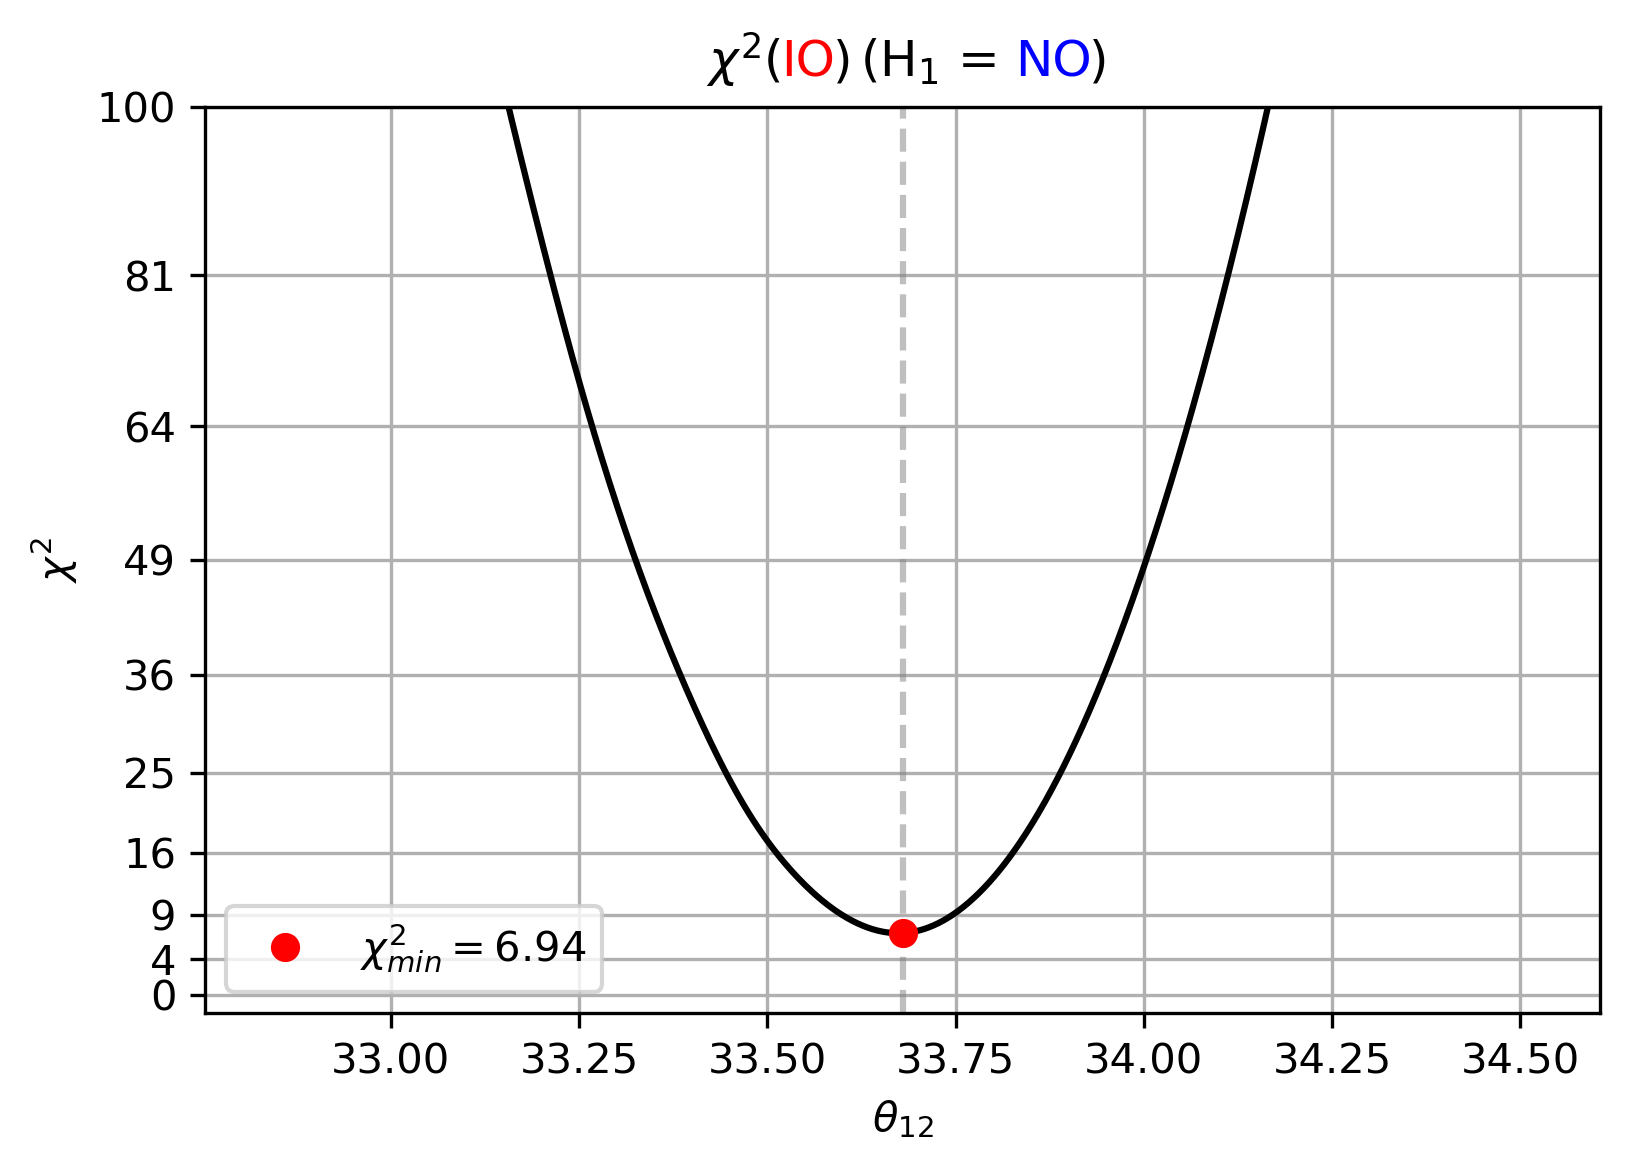

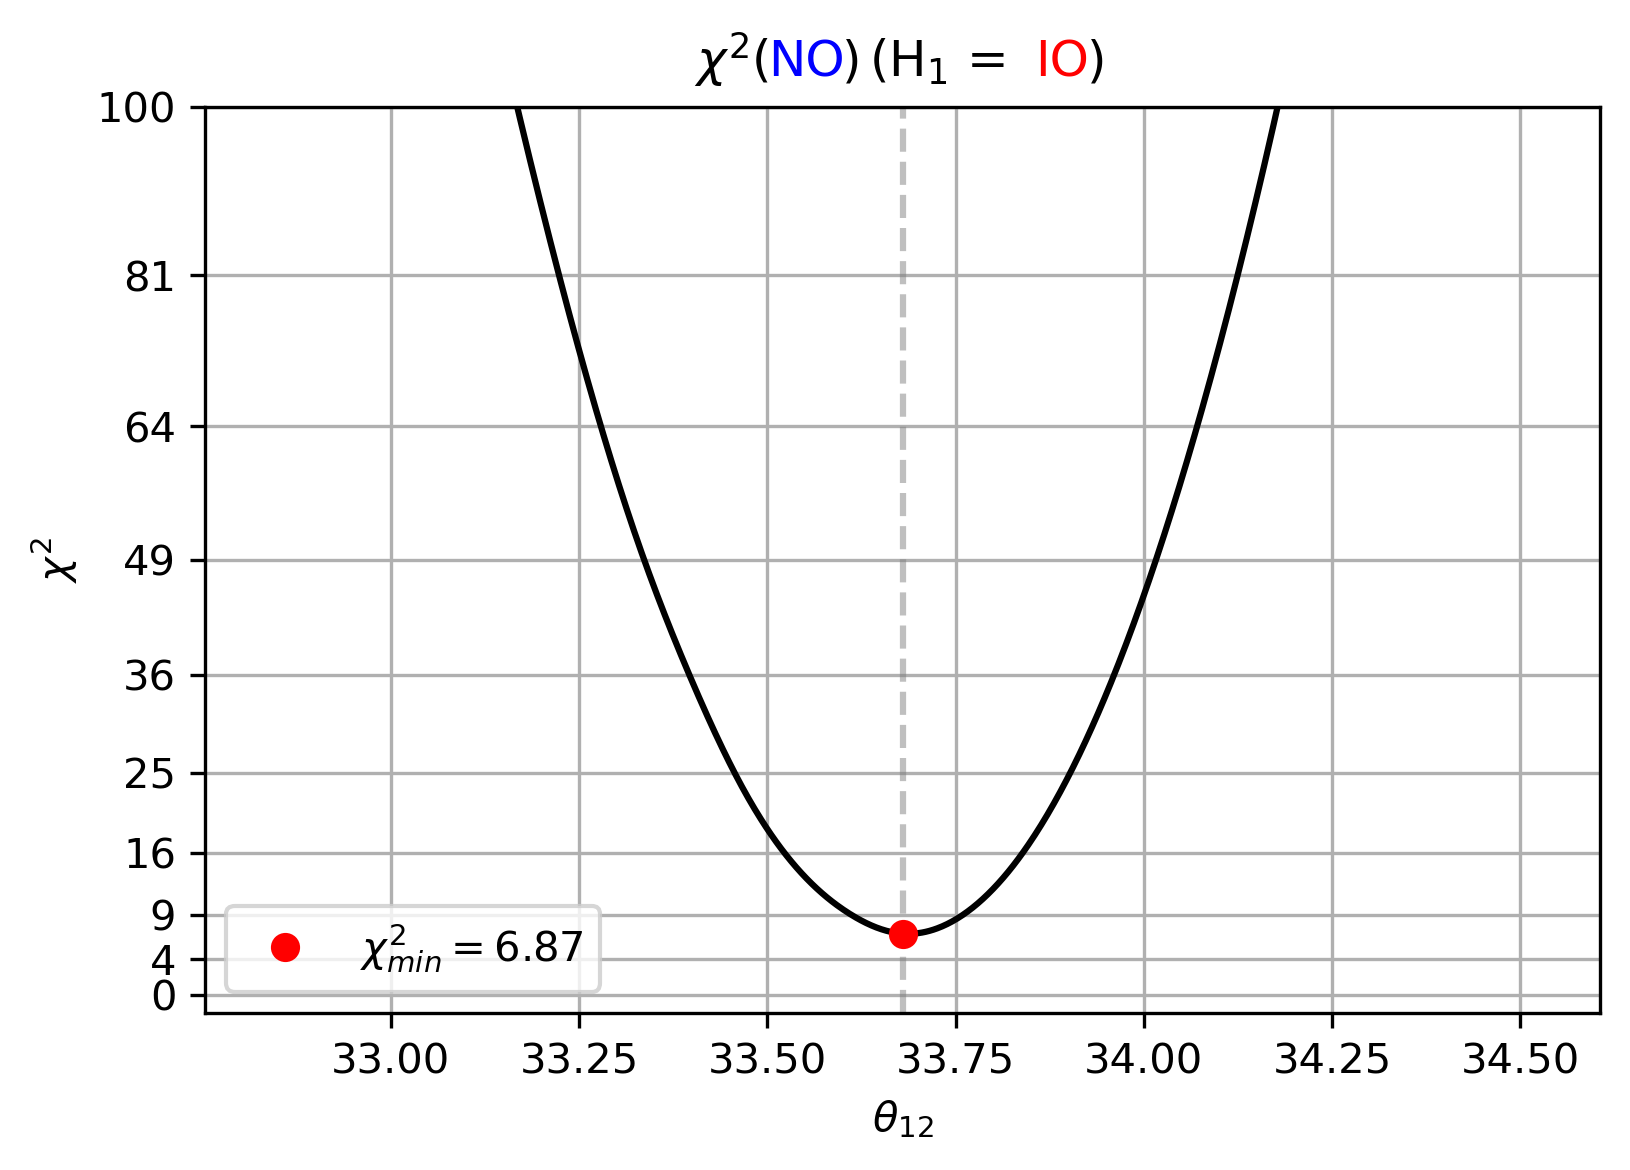

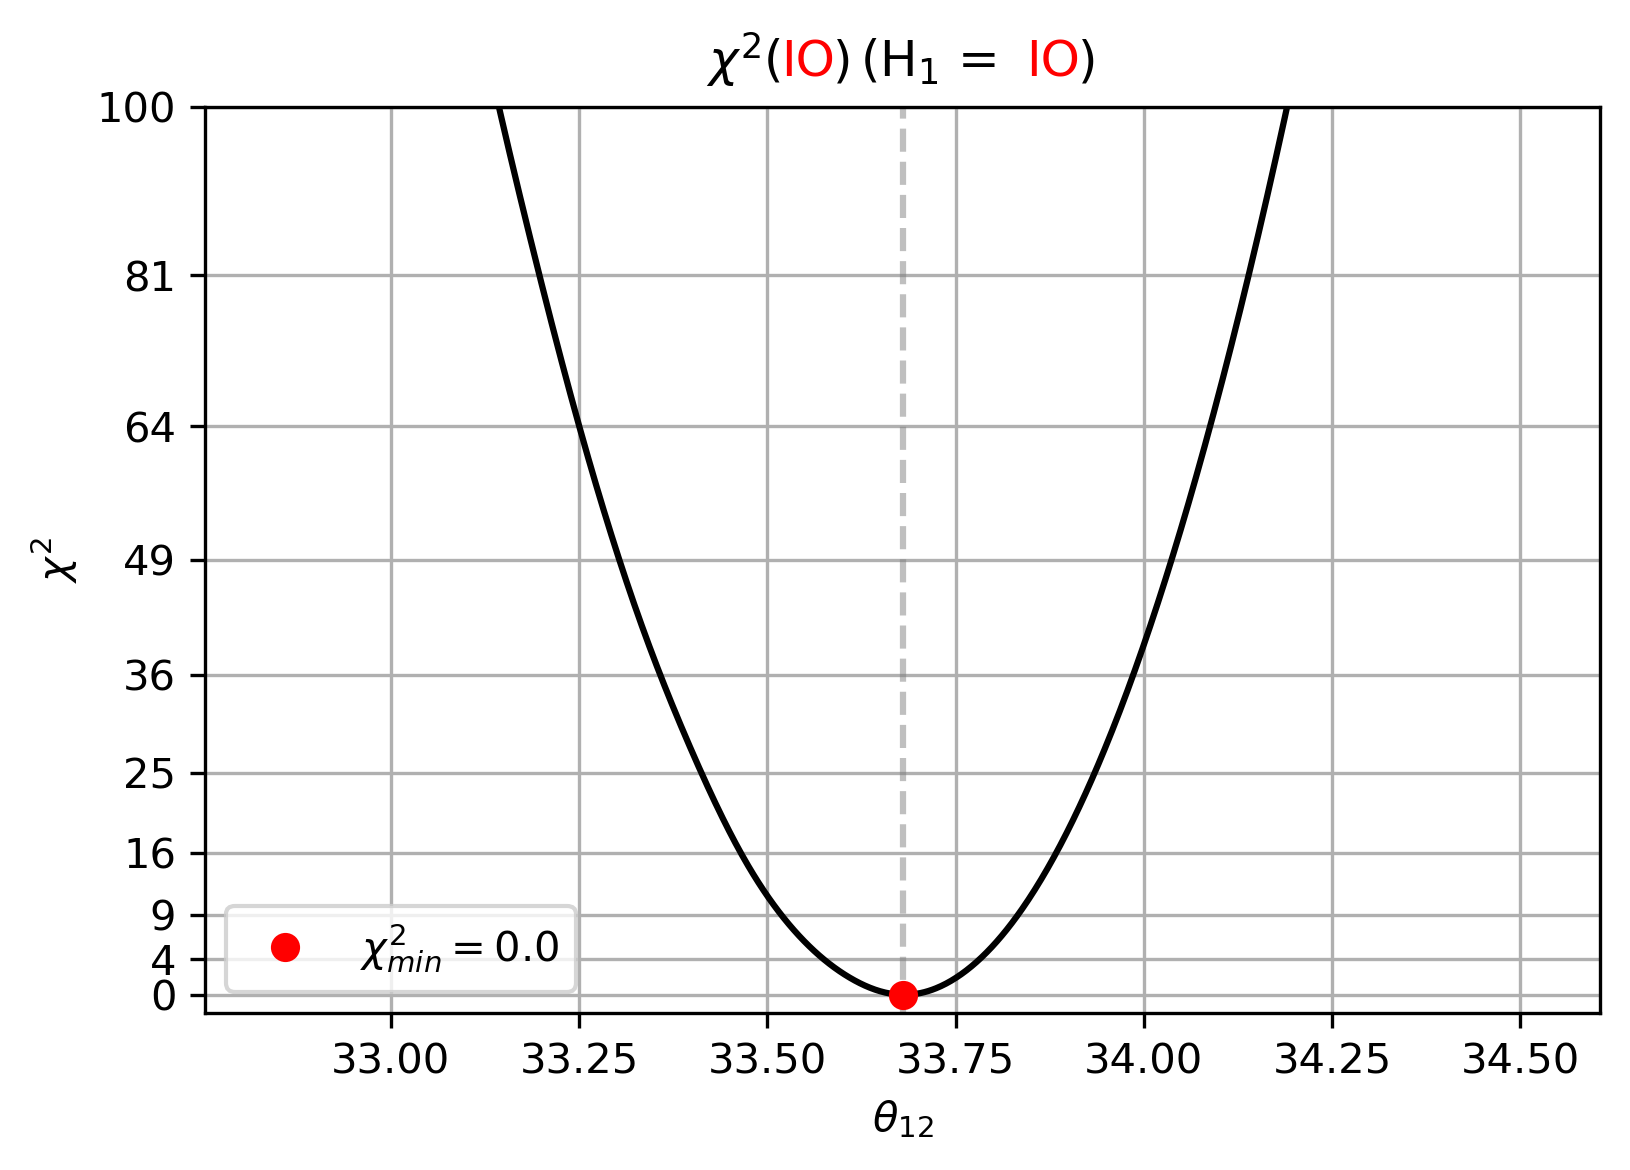

In [51]:
chi2_x_param(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO)